In [106]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import requests
import spotipy
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
from spotipy.oauth2 import SpotifyClientCredentials

# Import Auth
from config import CLIENT_ID
from config import CLIENT_SECRET

In [107]:
# Beyonce
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
  client_secret=CLIENT_SECRET))
bey_tracks={}
bey_track_uri=[]
bey_track_name= []
bey_track_pop=[]
bey_artist_name=[]

bey_uri='spotify:artist:6vWDO969PvNqNYHIOW5v0m'
bey_results = sp.artist_top_tracks(bey_uri, country='US')
for track in bey_results['tracks']:
    print (track['name'], track['artists'][0]['name'])
    print (track['uri'])
    
    bey_track_uri.append(track['uri'])
    bey_track_name.append(track['name'])
    bey_track_pop.append(track['popularity'])
    bey_artist_name.append(track['artists'][0]['name'])   

# print(bey_track_uri, bey_track_name)
beydata=sp.audio_features(tracks=bey_track_uri)

# Slicing these indexes so that they are the same len as other audio features
bey_track_name = bey_track_name[0:9]
bey_track_pop= bey_track_pop[0:9]
bey_artist_name = bey_artist_name[0:9]


bey_tracks_tempo=[]
bey_tracks_uri=[]
bey_tracks_energy=[]
bey_tracks_loudness=[]
bey_tracks_speechiness=[]
bey_tracks_danceability=[]
bey_tracks_valence=[]

for bey in range(len(beydata)-1):
    bey_tracks_tempo.append(beydata[bey]['tempo'])
    bey_tracks_uri.append(beydata[bey]['uri'])
    bey_tracks_energy.append(beydata[bey]['energy'])
    bey_tracks_loudness.append(beydata[bey]['loudness'])
    bey_tracks_speechiness.append(beydata[bey]['speechiness'])
    bey_tracks_danceability.append(beydata[bey]['danceability'])
    bey_tracks_valence.append(beydata[bey]['valence'])

beydata_df=pd.DataFrame({
    'uri':bey_tracks_uri,
    'artist': bey_artist_name, 
    'track':bey_track_name,
    'tempo': bey_tracks_tempo,
    'energy':bey_tracks_energy,
    'loudness': bey_tracks_loudness,
    'speechiness':bey_tracks_speechiness,
    'danceability':bey_tracks_danceability,
    'popularity': bey_track_pop,
    'valence': bey_tracks_valence
    })
beydata_df

CUFF IT Beyoncé
spotify:track:1xzi1Jcr7mEi9K2RfzLOqS
BREAK MY SOUL Beyoncé
spotify:track:5pyoxDZ1PX0KxBxiRVxA4U
Crazy In Love (feat. Jay-Z) Beyoncé
spotify:track:5IVuqXILoxVWvWEPm82Jxr
Halo Beyoncé
spotify:track:3ERa3mEeOnrh2Mc47qM6T1
ALIEN SUPERSTAR Beyoncé
spotify:track:1Hohk6AufHZOrrhMXZppax
Single Ladies (Put a Ring on It) Beyoncé
spotify:track:2ZBNclC5wm4GtiWaeh0DMx
ENERGY (feat. Beam) Beyoncé
spotify:track:0314PeD1sQNonfVWix3B2K
Love On Top Beyoncé
spotify:track:1z6WtY7X4HQJvzxC4UgkSf
Irreplaceable Beyoncé
spotify:track:1G7DcLzPnopdZjLkev0K4e
I'M THAT GIRL Beyoncé
spotify:track:1MpCaOeUWhox2Fgigbe1cL


,uri,artist,track,tempo,energy,loudness,speechiness,danceability,popularity,valence
0,spotify:track:1xzi1Jcr7mEi9K2RfzLOqS,Beyoncé,CUFF IT,115.042,0.689,-5.668,0.1410,0.780,88,0.642
1,spotify:track:5pyoxDZ1PX0KxBxiRVxA4U,Beyoncé,BREAK MY SOUL,114.942,0.887,-5.039,0.0795,0.693,75,0.864
2,spotify:track:5IVuqXILoxVWvWEPm82Jxr,Beyoncé,Crazy In Love (feat. Jay-Z),99.165,0.770,-6.596,0.2260,0.646,75,0.681
3,spotify:track:3ERa3mEeOnrh2Mc47qM6T1,Beyoncé,Halo,79.983,0.720,-5.908,0.0628,0.508,62,0.472
4,spotify:track:1Hohk6AufHZOrrhMXZppax,Beyoncé,ALIEN SUPERSTAR,121.892,0.641,-6.398,0.0998,0.545,75,0.464
5,spotify:track:2ZBNclC5wm4GtiWaeh0DMx,Beyoncé,Single Ladies (Put a Ring on It),193.437,0.584,-5.293,0.2960,0.426,63,0.272
6,spotify:track:0314PeD1sQNonfVWix3B2K,Beyoncé,ENERGY (feat. Beam),114.991,0.519,-9.151,0.2600,0.903,72,0.587
7,spotify:track:1z6WtY7X4HQJvzxC4UgkSf,Beyoncé,Love On Top,94.103,0.749,-5.248,0.0886,0.652,72,0.651
8,spotify:track:1G7DcLzPnopdZjLkev0K4e,Beyoncé,Irreplaceable,175.906,0.697,-4.192,0.3260,0.576,61,0.501


In [108]:
# Morgan Wallen
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
  client_secret=CLIENT_SECRET))
mw_tracks={}
mw_tracks_uri=[]
mw_tracks_name= []
mw_track_pop=[]
mw_artist_name=[]

mw_uri='spotify:artist:4oUHIQIBe0LHzYfvXNW4QM'
mw_results = sp.artist_top_tracks(mw_uri, country='US')
for track in mw_results['tracks']:
    print (track['name'], track['artists'][0]['name'])
    print (track['uri'])
    
    mw_tracks_uri.append(track['uri'])
    mw_tracks_name.append(track['name'])
    mw_track_pop.append(track['popularity'])
    mw_artist_name.append(track['artists'][0]['name'])  

# Pull various audio data points from artist's top tracks
mwdata=sp.audio_features(tracks=mw_tracks_uri)

# Slicing these indexes so that they are the same len as other audio features
mw_tracks_name = mw_tracks_name[0:9]
mw_track_pop= mw_track_pop[0:9]
mw_artist_name = mw_artist_name[0:9]


mw_tracks_tempo=[]
mw_tracks_uri=[]
mw_tracks_energy=[]
mw_tracks_loudness=[]
mw_tracks_speechiness=[]
mw_tracks_danceability=[]
mw_tracks_valence=[]

for mw in range(len(mwdata)-1):
    mw_tracks_tempo.append(mwdata[mw]['tempo'])
    mw_tracks_uri.append(mwdata[mw]['uri'])
    mw_tracks_energy.append(mwdata[mw]['energy'])
    mw_tracks_loudness.append(mwdata[mw]['loudness'])
    mw_tracks_speechiness.append(mwdata[mw]['speechiness'])
    mw_tracks_danceability.append(mwdata[mw]['danceability'])
    mw_tracks_valence.append(mwdata[mw]['valence'])

mwdata_df=pd.DataFrame({
    'uri':mw_tracks_uri,
    'artist': mw_artist_name,
    'track':mw_tracks_name,
    'tempo': mw_tracks_tempo,
    'energy':mw_tracks_energy,
    'loudness': mw_tracks_loudness,
    'speechiness':mw_tracks_speechiness,
    'danceability':mw_tracks_danceability,
    'popularity': mw_track_pop,
    'valence': mw_tracks_valence
    })
mwdata_df

Last Night Morgan Wallen
spotify:track:59uQI0PADDKeE6UZDTJEe8
You Proof Morgan Wallen
spotify:track:5uU1uuyaUIBOiiUSQG7Wl3
Wasted On You Morgan Wallen
spotify:track:3cBsEDNhFI9E82vPj3kvi3
Thought You Should Know Morgan Wallen
spotify:track:6NHpyYvJyQsg2nXXzGYc2R
One Thing At A Time Morgan Wallen
spotify:track:6KGtAlYvgm4W9PoYabFAYE
Whiskey Glasses Morgan Wallen
spotify:track:6foY66mWZN0pSRjZ408c00
Chasin' You Morgan Wallen
spotify:track:5MwynWK9s4hlyKHqhkNn4A
I Wrote The Book Morgan Wallen
spotify:track:76FeKAU0A4dpFGrVSg2TX2
Everything I Love Morgan Wallen
spotify:track:62L9AbfPmUm8gV578rxC51
More Than My Hometown Morgan Wallen
spotify:track:5OELUCYgOHKFAvCERnAvfS


,uri,artist,track,tempo,energy,loudness,speechiness,danceability,popularity,valence
0,spotify:track:59uQI0PADDKeE6UZDTJEe8,Morgan Wallen,Last Night,203.853,0.675,-5.382,0.0357,0.517,82,0.518
1,spotify:track:5uU1uuyaUIBOiiUSQG7Wl3,Morgan Wallen,You Proof,119.706,0.850,-4.913,0.0336,0.731,81,0.644
2,spotify:track:3cBsEDNhFI9E82vPj3kvi3,Morgan Wallen,Wasted On You,196.000,0.657,-5.240,0.0318,0.505,79,0.252
3,spotify:track:6NHpyYvJyQsg2nXXzGYc2R,Morgan Wallen,Thought You Should Know,139.993,0.695,-6.174,0.0278,0.529,77,0.514
4,spotify:track:6KGtAlYvgm4W9PoYabFAYE,Morgan Wallen,One Thing At A Time,141.982,0.913,-5.126,0.0296,0.614,77,0.920
5,spotify:track:6foY66mWZN0pSRjZ408c00,Morgan Wallen,Whiskey Glasses,149.959,0.680,-4.580,0.0289,0.614,77,0.707
6,spotify:track:5MwynWK9s4hlyKHqhkNn4A,Morgan Wallen,Chasin' You,97.074,0.591,-5.785,0.0277,0.631,76,0.489
7,spotify:track:76FeKAU0A4dpFGrVSg2TX2,Morgan Wallen,I Wrote The Book,143.978,0.805,-3.739,0.0403,0.682,75,0.826
8,spotify:track:62L9AbfPmUm8gV578rxC51,Morgan Wallen,Everything I Love,103.996,0.851,-3.798,0.0260,0.563,74,0.720


In [109]:
# Adele
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
  client_secret=CLIENT_SECRET))
adl_tracks={}
adl_track_uri=[]
adl_track_name= []
adl_track_pop=[]
adl_artist_name=[]

adl_uri= "spotify:artist:4dpARuHxo51G3z768sgnrY"
adl_results = sp.artist_top_tracks(adl_uri, country='US')
for track in adl_results['tracks']:
    print (track['name'], track['artists'][0]['name'])
    print (track['uri'])
    
    adl_track_uri.append(track['uri'])
    adl_track_name.append(track['name'])
    adl_track_pop.append(track['popularity'])
    adl_artist_name.append(track['artists'][0]['name'])

# Pull various audio data points from artist's top tracks
adldata=sp.audio_features(tracks=adl_track_uri)

# Slicing these indexes so that they are the same len as other audio features
adl_track_name = adl_track_name[0:9]
adl_track_pop= adl_track_pop[0:9]
adl_artist_name = adl_artist_name[0:9]

adl_tracks_tempo=[]
adl_tracks_uri=[]
adl_tracks_energy=[]
adl_tracks_loudness=[]
adl_tracks_speechiness=[]
adl_tracks_danceability=[]
adl_tracks_valence=[]

for adl in range(len(adldata)-1):
    adl_tracks_tempo.append(adldata[adl]['tempo'])
    adl_tracks_uri.append(adldata[adl]['uri'])
    adl_tracks_energy.append(adldata[adl]['energy'])
    adl_tracks_loudness.append(adldata[adl]['loudness'])
    adl_tracks_speechiness.append(adldata[adl]['speechiness'])
    adl_tracks_danceability.append(adldata[adl]['danceability'])
    adl_tracks_valence.append(adldata[adl]['valence'])

adldata_df=pd.DataFrame({
    'uri':adl_tracks_uri,
    'artist': adl_artist_name,
    'track':adl_track_name,
    'tempo': adl_tracks_tempo,
    'energy':adl_tracks_energy,
    'loudness': adl_tracks_loudness,
    'speechiness':adl_tracks_speechiness,
    'danceability':adl_tracks_danceability,    
    'popularity': adl_track_pop,
    'valence': adl_tracks_valence
    })
adldata_df

Easy On Me Adele
spotify:track:46IZ0fSY2mpAiktS3KOqds
Set Fire to the Rain Adele
spotify:track:73CMRj62VK8nUS4ezD2wvi
Rolling in the Deep Adele
spotify:track:1c8gk2PeTE04A1pIDH9YMk
Someone Like You Adele
spotify:track:1zwMYTA5nlNjZxYrvBB2pV
Love In The Dark Adele
spotify:track:7B5Npv8NjjTCzk8PLpU66h
When We Were Young Adele
spotify:track:7GgWAITsYJaRM3r50rfh5w
Oh My God Adele
spotify:track:3Kkjo3cT83cw09VJyrLNwX
Make You Feel My Love Adele
spotify:track:5FgPwJ7Nh2FVmIXviKl2VF
All I Ask Adele
spotify:track:05TOt5Vz4StdjMpEdFPlvB
Hello Adele
spotify:track:62PaSfnXSMyLshYJrlTuL3


,uri,artist,track,tempo,energy,loudness,speechiness,danceability,popularity,valence
0,spotify:track:46IZ0fSY2mpAiktS3KOqds,Adele,Easy On Me,141.981,0.366,-7.519,0.0282,0.604,79,0.1300
1,spotify:track:73CMRj62VK8nUS4ezD2wvi,Adele,Set Fire to the Rain,107.993,0.670,-3.882,0.0249,0.603,77,0.4460
2,spotify:track:1c8gk2PeTE04A1pIDH9YMk,Adele,Rolling in the Deep,104.948,0.769,-5.114,0.0298,0.730,76,0.5070
3,spotify:track:1zwMYTA5nlNjZxYrvBB2pV,Adele,Someone Like You,135.187,0.319,-8.251,0.0281,0.556,76,0.2940
4,spotify:track:7B5Npv8NjjTCzk8PLpU66h,Adele,Love In The Dark,109.821,0.341,-6.057,0.0309,0.331,73,0.1520
5,spotify:track:7GgWAITsYJaRM3r50rfh5w,Adele,When We Were Young,144.361,0.595,-5.936,0.0496,0.376,71,0.2650
6,spotify:track:3Kkjo3cT83cw09VJyrLNwX,Adele,Oh My God,88.098,0.725,-3.906,0.0460,0.534,78,0.5500
7,spotify:track:5FgPwJ7Nh2FVmIXviKl2VF,Adele,Make You Feel My Love,65.180,0.172,-10.636,0.0326,0.317,70,0.0963
8,spotify:track:05TOt5Vz4StdjMpEdFPlvB,Adele,All I Ask,141.916,0.280,-5.494,0.0283,0.591,68,0.3480


In [110]:
# SZA
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
  client_secret=CLIENT_SECRET))
sza_tracks={}
sza_tracks_uri=[]
sza_tracks_name= []
sza_track_pop=[]
sza_artist_name=[]

sza_uri="spotify:artist:7tYKF4w9nC0nq9CsPZTHyP"
sza_results = sp.artist_top_tracks(sza_uri, country='US')
for track in sza_results['tracks']:
    print (track['name'], track['artists'][0]['name'])
    print (track['uri'])
    
    sza_tracks_uri.append(track['uri'])
    sza_tracks_name.append(track['name'])
    sza_track_pop.append(track['popularity'])
    sza_artist_name.append(track['artists'][0]['name'])

# Pull various audio data points from artist's top tracks
szadata=sp.audio_features(tracks=sza_tracks_uri)

# Slicing these indexes so that they are the same len as other audio features
sza_tracks_name = sza_tracks_name[0:9]
sza_track_pop= sza_track_pop[0:9]
sza_artist_name = sza_artist_name[0:9]


sza_tracks_tempo=[]
sza_tracks_uri=[]
sza_tracks_energy=[]
sza_tracks_loudness=[]
sza_tracks_speechiness=[]
sza_tracks_danceability=[]
sza_tracks_valence=[]

for sza in range(len(szadata)-1):
    sza_tracks_tempo.append(szadata[sza]['tempo'])
    sza_tracks_uri.append(szadata[sza]['uri'])
    sza_tracks_energy.append(szadata[sza]['energy'])
    sza_tracks_loudness.append(szadata[sza]['loudness'])
    sza_tracks_speechiness.append(szadata[sza]['speechiness'])
    sza_tracks_danceability.append(szadata[sza]['danceability'])
    sza_tracks_valence.append(szadata[sza]['valence'])

szadata_df=pd.DataFrame({
    'uri':sza_tracks_uri,
    'artist': sza_artist_name,
    'track':sza_tracks_name,
    'tempo': sza_tracks_tempo,
    'energy':sza_tracks_energy,
    'loudness': sza_tracks_loudness,
    'speechiness':sza_tracks_speechiness,
    'danceability':sza_tracks_danceability,
    'popularity': sza_track_pop,
    'valence': sza_tracks_valence
    })
szadata_df

Kill Bill SZA
spotify:track:1Qrg8KqiBpW07V7PNxwwwL
Snooze SZA
spotify:track:4iZ4pt7kvcaH6Yo8UoZ4s2
Nobody Gets Me SZA
spotify:track:5Y35SjAfXjjG0sFQ3KOxmm
Low SZA
spotify:track:2GAhgAjOhEmItWLfgisyOn
Shirt SZA
spotify:track:2wSTnntOPRi7aQneobFtU4
Blind SZA
spotify:track:2CSRrnOEELmhpq8iaAi9cd
Good Days SZA
spotify:track:4PMqSO5qyjpvzhlLI5GnID
Kiss Me More (feat. SZA) Doja Cat
spotify:track:3DarAbFujv6eYNliUTyqtz
All The Stars (with SZA) Kendrick Lamar
spotify:track:3GCdLUSnKSMJhs4Tj6CV3s
Love Language SZA
spotify:track:1eIXYZWEfJO3Na2LCCnIJE


,uri,artist,track,tempo,energy,loudness,speechiness,danceability,popularity,valence
0,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,SZA,Kill Bill,88.980,0.735,-5.747,0.0391,0.644,91,0.418
1,spotify:track:4iZ4pt7kvcaH6Yo8UoZ4s2,SZA,Snooze,143.008,0.551,-7.231,0.1320,0.559,87,0.392
2,spotify:track:5Y35SjAfXjjG0sFQ3KOxmm,SZA,Nobody Gets Me,99.796,0.284,-8.285,0.0285,0.358,87,0.276
3,spotify:track:2GAhgAjOhEmItWLfgisyOn,SZA,Low,145.044,0.546,-7.234,0.0559,0.698,86,0.335
4,spotify:track:2wSTnntOPRi7aQneobFtU4,SZA,Shirt,120.009,0.512,-7.720,0.1020,0.848,82,0.572
5,spotify:track:2CSRrnOEELmhpq8iaAi9cd,SZA,Blind,114.225,0.279,-11.776,0.0373,0.461,83,0.599
6,spotify:track:4PMqSO5qyjpvzhlLI5GnID,SZA,Good Days,121.070,0.651,-8.810,0.0568,0.461,77,0.383
7,spotify:track:3DarAbFujv6eYNliUTyqtz,Doja Cat,Kiss Me More (feat. SZA),110.970,0.705,-3.463,0.0284,0.764,77,0.781
8,spotify:track:3GCdLUSnKSMJhs4Tj6CV3s,Kendrick Lamar,All The Stars (with SZA),96.924,0.633,-4.946,0.0597,0.698,81,0.552


In [111]:
# Bad Bunny
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
  client_secret=CLIENT_SECRET))
bb_tracks={}
bb_tracks_uri=[]
bb_tracks_name= []
bb_track_pop=[]
bb_artist_name=[]

bb_uri="spotify:artist:4q3ewBCX7sLwd24euuV69X"
bb_results = sp.artist_top_tracks(bb_uri, country='US')
for track in bb_results['tracks']:
    print (track['name'], track['artists'][0]['name'])
    print (track['uri'])
    
    bb_tracks_uri.append(track['uri'])
    bb_tracks_name.append(track['name'])
    bb_track_pop.append(track['popularity'])
    bb_artist_name.append(track['artists'][0]['name'])


bbdata=sp.audio_features(tracks=bb_tracks_uri)

# Pull various audio data points from artist's top tracks
bbdata=sp.audio_features(tracks=bb_tracks_uri)

# Slicing these indexes so that they are the same len as other audio features
bb_tracks_name = bb_tracks_name[0:9]
bb_track_pop= bb_track_pop[0:9]
bb_artist_name = bb_artist_name[0:9]



bb_tracks_tempo=[]
bb_tracks_uri=[]
bb_tracks_energy=[]
bb_tracks_loudness=[]
bb_tracks_speechiness=[]
bb_tracks_danceability=[]
bb_tracks_valence=[]

for bb in range(len(bbdata)-1):
    bb_tracks_tempo.append(bbdata[bb]['tempo'])
    bb_tracks_uri.append(bbdata[bb]['uri'])
    bb_tracks_energy.append(bbdata[bb]['energy'])
    bb_tracks_loudness.append(bbdata[bb]['loudness'])
    bb_tracks_speechiness.append(bbdata[bb]['speechiness'])
    bb_tracks_danceability.append(bbdata[bb]['danceability'])
    bb_tracks_valence.append(bbdata[bb]['valence'])

bbdata_df=pd.DataFrame({
    'uri':bb_tracks_uri,
    'artist': bb_artist_name,
    'track':bb_tracks_name,
    'tempo': bb_tracks_tempo,
    'energy':bb_tracks_energy,
    'loudness': bb_tracks_loudness,
    'speechiness':bb_tracks_speechiness,
    'danceability':bb_tracks_danceability,
    'popularity': bb_track_pop,
    'valence': bb_tracks_valence
    })
bbdata_df

La Jumpa Arcángel
spotify:track:2mnXxnrX5vCGolNkaFvVeM
Me Porto Bonito Bad Bunny
spotify:track:6Sq7ltF9Qa7SNFBsV5Cogx
Tití Me Preguntó Bad Bunny
spotify:track:1IHWl5LamUGEuP4ozKQSXZ
Gato de Noche Ñengo Flow
spotify:track:54ELExv56KCAB4UP9cOCzC
Efecto Bad Bunny
spotify:track:5Eax0qFko2dh7Rl2lYs3bx
Ojitos Lindos Bad Bunny
spotify:track:3k3NWokhRRkEPhCzPmV8TW
Neverita Bad Bunny
spotify:track:31i56LZnwE6uSu3exoHjtB
Moscow Mule Bad Bunny
spotify:track:6Xom58OOXk2SoU711L2IXO
LA CANCIÓN J Balvin
spotify:track:0fea68AdmYNygeTGI4RC18
Yonaguni Bad Bunny
spotify:track:2JPLbjOn0wPCngEot2STUS


,uri,artist,track,tempo,energy,loudness,speechiness,danceability,popularity,valence
0,spotify:track:2mnXxnrX5vCGolNkaFvVeM,Arcángel,La Jumpa,140.020,0.234,-14.520,0.1780,0.887,85,0.197
1,spotify:track:6Sq7ltF9Qa7SNFBsV5Cogx,Bad Bunny,Me Porto Bonito,92.005,0.712,-5.105,0.0817,0.911,89,0.425
2,spotify:track:1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Tití Me Preguntó,106.672,0.715,-5.198,0.2530,0.650,89,0.187
3,spotify:track:54ELExv56KCAB4UP9cOCzC,Ñengo Flow,Gato de Noche,93.976,0.662,-3.894,0.1620,0.892,88,0.607
4,spotify:track:5Eax0qFko2dh7Rl2lYs3bx,Bad Bunny,Efecto,98.047,0.475,-8.797,0.0516,0.801,87,0.234
5,spotify:track:3k3NWokhRRkEPhCzPmV8TW,Bad Bunny,Ojitos Lindos,79.928,0.686,-5.745,0.0413,0.647,87,0.268
6,spotify:track:31i56LZnwE6uSu3exoHjtB,Bad Bunny,Neverita,122.016,0.498,-7.511,0.0478,0.876,86,0.428
7,spotify:track:6Xom58OOXk2SoU711L2IXO,Bad Bunny,Moscow Mule,99.968,0.674,-5.453,0.0333,0.804,85,0.292
8,spotify:track:0fea68AdmYNygeTGI4RC18,J Balvin,LA CANCIÓN,176.089,0.646,-5.795,0.3170,0.754,83,0.429


In [112]:
# Merge Beyonce & Morgan Wallen dataframes
bey_mw_df=pd.merge(beydata_df, mwdata_df, on=['uri', 'artist', 'track', 'tempo', 'energy', 'loudness', 'speechiness', 'danceability', 'popularity', 'valence'], how='outer')
bey_mw_df

,uri,artist,track,tempo,energy,loudness,speechiness,danceability,popularity,valence
0,spotify:track:1xzi1Jcr7mEi9K2RfzLOqS,Beyoncé,CUFF IT,115.042,0.689,-5.668,0.1410,0.780,88,0.642
1,spotify:track:5pyoxDZ1PX0KxBxiRVxA4U,Beyoncé,BREAK MY SOUL,114.942,0.887,-5.039,0.0795,0.693,75,0.864
2,spotify:track:5IVuqXILoxVWvWEPm82Jxr,Beyoncé,Crazy In Love (feat. Jay-Z),99.165,0.770,-6.596,0.2260,0.646,75,0.681
3,spotify:track:3ERa3mEeOnrh2Mc47qM6T1,Beyoncé,Halo,79.983,0.720,-5.908,0.0628,0.508,62,0.472
4,spotify:track:1Hohk6AufHZOrrhMXZppax,Beyoncé,ALIEN SUPERSTAR,121.892,0.641,-6.398,0.0998,0.545,75,0.464
5,spotify:track:2ZBNclC5wm4GtiWaeh0DMx,Beyoncé,Single Ladies (Put a Ring on It),193.437,0.584,-5.293,0.2960,0.426,63,0.272
6,spotify:track:0314PeD1sQNonfVWix3B2K,Beyoncé,ENERGY (feat. Beam),114.991,0.519,-9.151,0.2600,0.903,72,0.587
7,spotify:track:1z6WtY7X4HQJvzxC4UgkSf,Beyoncé,Love On Top,94.103,0.749,-5.248,0.0886,0.652,72,0.651
8,spotify:track:1G7DcLzPnopdZjLkev0K4e,Beyoncé,Irreplaceable,175.906,0.697,-4.192,0.3260,0.576,61,0.501
9,spotify:track:59uQI0PADDKeE6UZDTJEe8,Morgan Wallen,Last Night,203.853,0.675,-5.382,0.0357,0.517,82,0.518


In [113]:

# Merge Adele into current dataframe
adl_mrg_df=pd.merge(bey_mw_df, adldata_df, on=['uri', 'artist', 'track', 'tempo', 'energy', 'loudness', 'speechiness', 'danceability', 'popularity', 'valence'], how='outer')
adl_mrg_df

,uri,artist,track,tempo,energy,loudness,speechiness,danceability,popularity,valence
0,spotify:track:1xzi1Jcr7mEi9K2RfzLOqS,Beyoncé,CUFF IT,115.042,0.689,-5.668,0.1410,0.780,88,0.6420
1,spotify:track:5pyoxDZ1PX0KxBxiRVxA4U,Beyoncé,BREAK MY SOUL,114.942,0.887,-5.039,0.0795,0.693,75,0.8640
2,spotify:track:5IVuqXILoxVWvWEPm82Jxr,Beyoncé,Crazy In Love (feat. Jay-Z),99.165,0.770,-6.596,0.2260,0.646,75,0.6810
3,spotify:track:3ERa3mEeOnrh2Mc47qM6T1,Beyoncé,Halo,79.983,0.720,-5.908,0.0628,0.508,62,0.4720
4,spotify:track:1Hohk6AufHZOrrhMXZppax,Beyoncé,ALIEN SUPERSTAR,121.892,0.641,-6.398,0.0998,0.545,75,0.4640
5,spotify:track:2ZBNclC5wm4GtiWaeh0DMx,Beyoncé,Single Ladies (Put a Ring on It),193.437,0.584,-5.293,0.2960,0.426,63,0.2720
6,spotify:track:0314PeD1sQNonfVWix3B2K,Beyoncé,ENERGY (feat. Beam),114.991,0.519,-9.151,0.2600,0.903,72,0.5870
7,spotify:track:1z6WtY7X4HQJvzxC4UgkSf,Beyoncé,Love On Top,94.103,0.749,-5.248,0.0886,0.652,72,0.6510
8,spotify:track:1G7DcLzPnopdZjLkev0K4e,Beyoncé,Irreplaceable,175.906,0.697,-4.192,0.3260,0.576,61,0.5010
9,spotify:track:59uQI0PADDKeE6UZDTJEe8,Morgan Wallen,Last Night,203.853,0.675,-5.382,0.0357,0.517,82,0.5180


In [114]:
# Merge SZA into current dataframe
sza_mrg_df=pd.merge(adl_mrg_df, szadata_df, on=['uri', 'artist', 'track', 'tempo', 'energy', 'loudness', 'speechiness', 'danceability', 'popularity', 'valence'], how='outer')
sza_mrg_df

,uri,artist,track,tempo,energy,loudness,speechiness,danceability,popularity,valence
0,spotify:track:1xzi1Jcr7mEi9K2RfzLOqS,Beyoncé,CUFF IT,115.042,0.689,-5.668,0.1410,0.780,88,0.6420
1,spotify:track:5pyoxDZ1PX0KxBxiRVxA4U,Beyoncé,BREAK MY SOUL,114.942,0.887,-5.039,0.0795,0.693,75,0.8640
2,spotify:track:5IVuqXILoxVWvWEPm82Jxr,Beyoncé,Crazy In Love (feat. Jay-Z),99.165,0.770,-6.596,0.2260,0.646,75,0.6810
3,spotify:track:3ERa3mEeOnrh2Mc47qM6T1,Beyoncé,Halo,79.983,0.720,-5.908,0.0628,0.508,62,0.4720
4,spotify:track:1Hohk6AufHZOrrhMXZppax,Beyoncé,ALIEN SUPERSTAR,121.892,0.641,-6.398,0.0998,0.545,75,0.4640
5,spotify:track:2ZBNclC5wm4GtiWaeh0DMx,Beyoncé,Single Ladies (Put a Ring on It),193.437,0.584,-5.293,0.2960,0.426,63,0.2720
6,spotify:track:0314PeD1sQNonfVWix3B2K,Beyoncé,ENERGY (feat. Beam),114.991,0.519,-9.151,0.2600,0.903,72,0.5870
7,spotify:track:1z6WtY7X4HQJvzxC4UgkSf,Beyoncé,Love On Top,94.103,0.749,-5.248,0.0886,0.652,72,0.6510
8,spotify:track:1G7DcLzPnopdZjLkev0K4e,Beyoncé,Irreplaceable,175.906,0.697,-4.192,0.3260,0.576,61,0.5010
9,spotify:track:59uQI0PADDKeE6UZDTJEe8,Morgan Wallen,Last Night,203.853,0.675,-5.382,0.0357,0.517,82,0.5180


In [115]:
# Merge Bad Bunny into current dataframe to make master track df
master_track_df=pd.merge(sza_mrg_df, bbdata_df, on=['uri', 'artist', 'track', 'tempo', 'energy', 'loudness', 'speechiness', 'danceability', 'popularity', 'valence'], how='outer')
master_track_df

,uri,artist,track,tempo,energy,loudness,speechiness,danceability,popularity,valence
0,spotify:track:1xzi1Jcr7mEi9K2RfzLOqS,Beyoncé,CUFF IT,115.042,0.689,-5.668,0.1410,0.780,88,0.6420
1,spotify:track:5pyoxDZ1PX0KxBxiRVxA4U,Beyoncé,BREAK MY SOUL,114.942,0.887,-5.039,0.0795,0.693,75,0.8640
2,spotify:track:5IVuqXILoxVWvWEPm82Jxr,Beyoncé,Crazy In Love (feat. Jay-Z),99.165,0.770,-6.596,0.2260,0.646,75,0.6810
3,spotify:track:3ERa3mEeOnrh2Mc47qM6T1,Beyoncé,Halo,79.983,0.720,-5.908,0.0628,0.508,62,0.4720
4,spotify:track:1Hohk6AufHZOrrhMXZppax,Beyoncé,ALIEN SUPERSTAR,121.892,0.641,-6.398,0.0998,0.545,75,0.4640
5,spotify:track:2ZBNclC5wm4GtiWaeh0DMx,Beyoncé,Single Ladies (Put a Ring on It),193.437,0.584,-5.293,0.2960,0.426,63,0.2720
6,spotify:track:0314PeD1sQNonfVWix3B2K,Beyoncé,ENERGY (feat. Beam),114.991,0.519,-9.151,0.2600,0.903,72,0.5870
7,spotify:track:1z6WtY7X4HQJvzxC4UgkSf,Beyoncé,Love On Top,94.103,0.749,-5.248,0.0886,0.652,72,0.6510
8,spotify:track:1G7DcLzPnopdZjLkev0K4e,Beyoncé,Irreplaceable,175.906,0.697,-4.192,0.3260,0.576,61,0.5010
9,spotify:track:59uQI0PADDKeE6UZDTJEe8,Morgan Wallen,Last Night,203.853,0.675,-5.382,0.0357,0.517,82,0.5180


In [116]:
# Sort by popularity
sorted_master_df = master_track_df.sort_values(['popularity'], ascending=False)
sorted_master_df

,uri,artist,track,tempo,energy,loudness,speechiness,danceability,popularity,valence
27,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,SZA,Kill Bill,88.980,0.735,-5.747,0.0391,0.644,91,0.4180
38,spotify:track:1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Tití Me Preguntó,106.672,0.715,-5.198,0.2530,0.650,89,0.1870
37,spotify:track:6Sq7ltF9Qa7SNFBsV5Cogx,Bad Bunny,Me Porto Bonito,92.005,0.712,-5.105,0.0817,0.911,89,0.4250
0,spotify:track:1xzi1Jcr7mEi9K2RfzLOqS,Beyoncé,CUFF IT,115.042,0.689,-5.668,0.1410,0.780,88,0.6420
39,spotify:track:54ELExv56KCAB4UP9cOCzC,Ñengo Flow,Gato de Noche,93.976,0.662,-3.894,0.1620,0.892,88,0.6070
41,spotify:track:3k3NWokhRRkEPhCzPmV8TW,Bad Bunny,Ojitos Lindos,79.928,0.686,-5.745,0.0413,0.647,87,0.2680
40,spotify:track:5Eax0qFko2dh7Rl2lYs3bx,Bad Bunny,Efecto,98.047,0.475,-8.797,0.0516,0.801,87,0.2340
29,spotify:track:5Y35SjAfXjjG0sFQ3KOxmm,SZA,Nobody Gets Me,99.796,0.284,-8.285,0.0285,0.358,87,0.2760
28,spotify:track:4iZ4pt7kvcaH6Yo8UoZ4s2,SZA,Snooze,143.008,0.551,-7.231,0.1320,0.559,87,0.3920
42,spotify:track:31i56LZnwE6uSu3exoHjtB,Bad Bunny,Neverita,122.016,0.498,-7.511,0.0478,0.876,86,0.4280


The r-value is:-0.22589406525380312


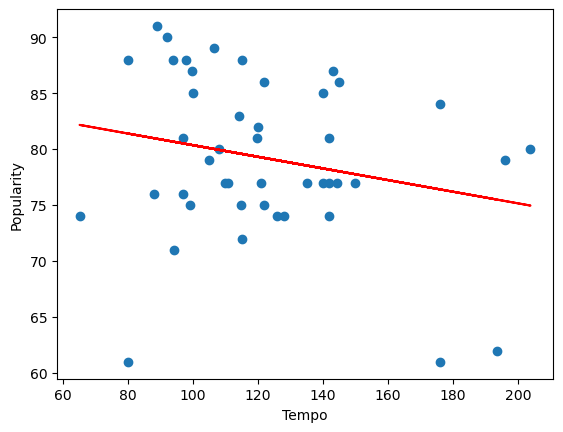

In [115]:
#all songs pop vs tempo
x_values = sorted_master_df['tempo']
y_values = sorted_master_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(88,120),fontsize=15,color="red")
plt.xlabel('Tempo')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.0944627350188154


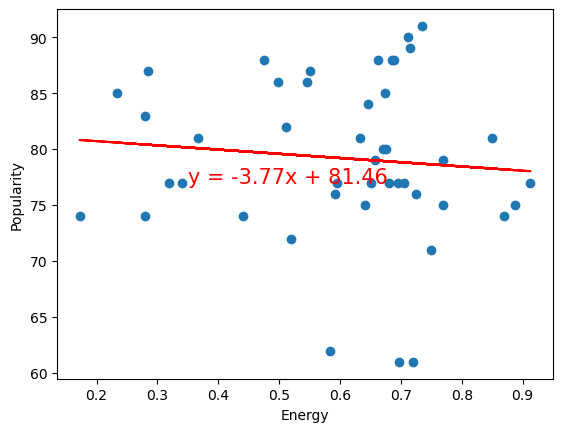

In [126]:
#all songs pop vs Energy
x_values = sorted_master_df['energy']
y_values = sorted_master_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.35,77),fontsize=15,color="red")
plt.xlabel('Energy')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.14814867163213133


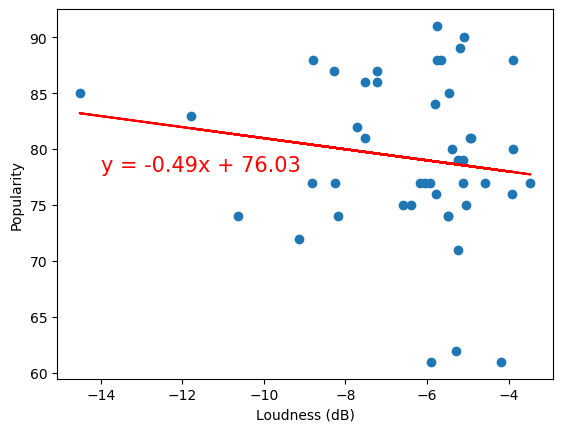

In [123]:
#all songs pop vs loudness
x_values = sorted_master_df['loudness']
y_values = sorted_master_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-14,78),fontsize=15,color="red")
plt.xlabel('Loudness (dB)')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.19425093789727363


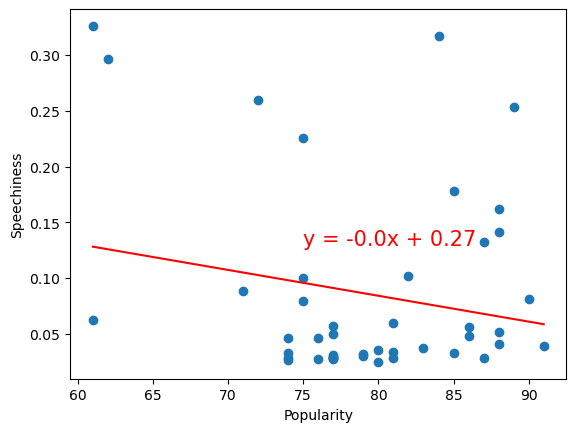

In [121]:
#top tier pop vs speechiness
x_values = sorted_master_df['popularity']
y_values = sorted_master_df['speechiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(75,0.13),fontsize=15,color="red")
plt.xlabel('Popularity')
plt.ylabel('Speechiness')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.41042780026791864


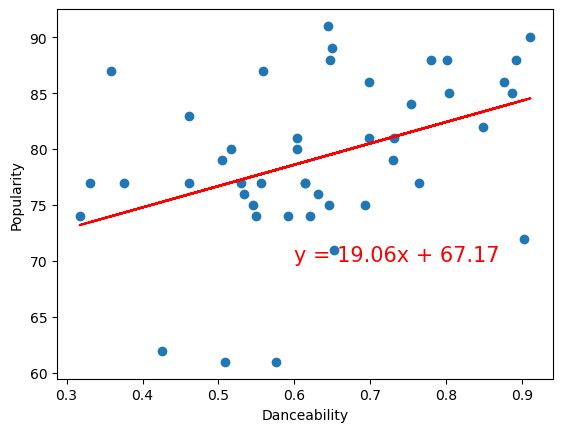

In [122]:
#all songs pop vs danceability
x_values = sorted_master_df['danceability']
y_values = sorted_master_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.6,70),fontsize=15,color="red")
plt.xlabel('Danceability')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

In [46]:
#create top tier
top_tier_songs_df = sorted_master_df.loc[sorted_master_df['popularity'] >= 86]
top_tier_songs_df

,uri,artist,track,tempo,energy,loudness,speechiness,danceability,popularity
27,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,SZA,Kill Bill,88.980,0.735,-5.747,0.0391,0.644,91
37,spotify:track:6Sq7ltF9Qa7SNFBsV5Cogx,Bad Bunny,Me Porto Bonito,92.005,0.712,-5.105,0.0817,0.911,90
38,spotify:track:1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Tití Me Preguntó,106.672,0.715,-5.198,0.2530,0.650,89
0,spotify:track:1xzi1Jcr7mEi9K2RfzLOqS,Beyoncé,CUFF IT,115.042,0.689,-5.668,0.1410,0.780,88
41,spotify:track:3k3NWokhRRkEPhCzPmV8TW,Bad Bunny,Ojitos Lindos,79.928,0.686,-5.745,0.0413,0.647,88
40,spotify:track:5Eax0qFko2dh7Rl2lYs3bx,Bad Bunny,Efecto,98.047,0.475,-8.797,0.0516,0.801,88
39,spotify:track:54ELExv56KCAB4UP9cOCzC,Ñengo Flow,Gato de Noche,93.976,0.662,-3.894,0.1620,0.892,88
29,spotify:track:4iZ4pt7kvcaH6Yo8UoZ4s2,SZA,Snooze,143.008,0.551,-7.231,0.1320,0.559,87
28,spotify:track:5Y35SjAfXjjG0sFQ3KOxmm,SZA,Nobody Gets Me,99.796,0.284,-8.285,0.0285,0.358,87
42,spotify:track:31i56LZnwE6uSu3exoHjtB,Bad Bunny,Neverita,122.016,0.498,-7.511,0.0478,0.876,86


The r-value is:-0.659077014146074


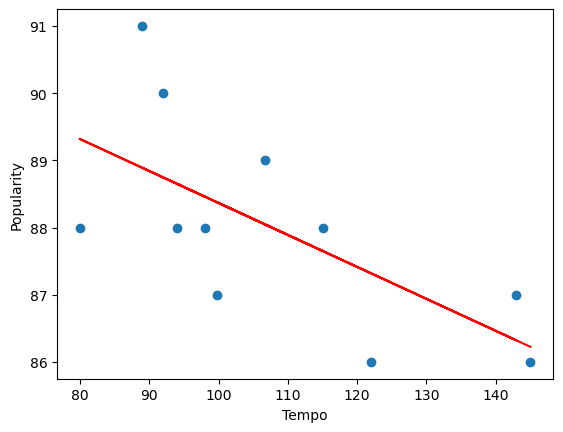

In [111]:
#top tier pop vs tempo
x_values = top_tier_songs_df['tempo']
y_values = top_tier_songs_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(88,120),fontsize=15,color="red")
plt.xlabel('Tempo')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.6582833122362981


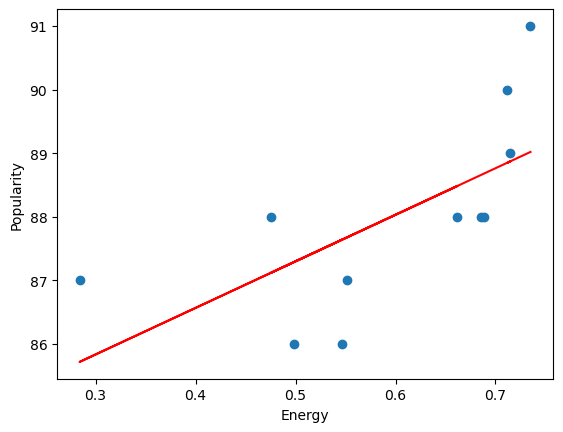

In [112]:
#top tier pop vs Energy
x_values = top_tier_songs_df['energy']
y_values = top_tier_songs_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(88,0.5),fontsize=15,color="red")
plt.xlabel('Energy')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.5292686314399484


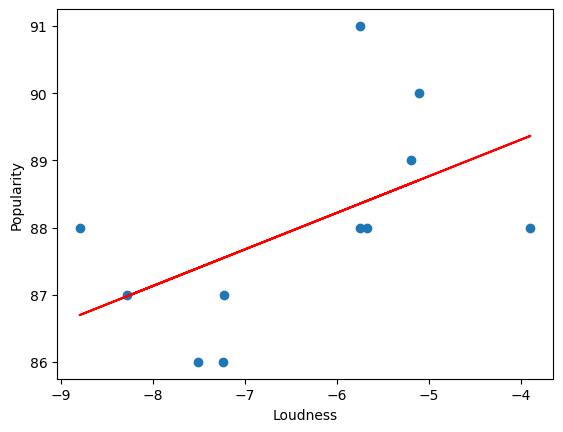

In [113]:
#top tier pop vs loudness
x_values = top_tier_songs_df['loudness']
y_values = top_tier_songs_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(88,-7),fontsize=15,color="red")
plt.xlabel('Loudness')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.1526188829774316


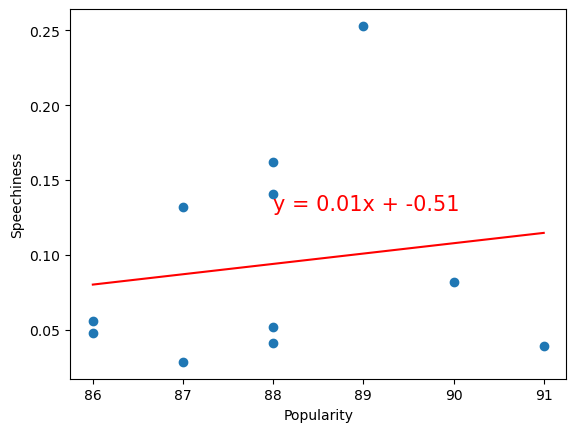

In [56]:
#top tier pop vs speechiness
x_values = top_tier_songs_df['popularity']
y_values = top_tier_songs_df['speechiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(88,0.13),fontsize=15,color="red")
plt.xlabel('Popularity')
plt.ylabel('Speechiness')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.1324301051095708


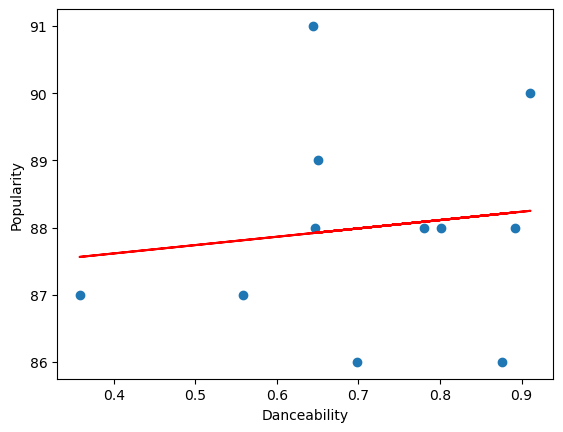

In [114]:
#top tier pop vs danceability
x_values = top_tier_songs_df['danceability']
y_values = top_tier_songs_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(88,0.6),fontsize=15,color="red")
plt.xlabel('Danceability')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

In [80]:
#calculate mean for top tier categories
top_tier_popularity_mean = top_tier_songs_df['popularity'].mean()
top_tier_tempo_mean = top_tier_songs_df['tempo'].mean()
top_tier_loudness_mean = top_tier_songs_df['loudness'].mean()
top_tier_energy_mean = top_tier_songs_df['energy'].mean()
top_tier_speechiness_mean = top_tier_songs_df['speechiness'].mean()
top_tier_danceability_mean = top_tier_songs_df['danceability'].mean()

In [81]:
top_tier_mean_df = pd.DataFrame({
    "Top Tier Popularity Mean":[top_tier_popularity_mean],
    "Top Tier Tempo Mean":[top_tier_tempo_mean],
    "Top Tier Loudness Mean": [top_tier_loudness_mean],
    "Top Tier Energy Mean":[top_tier_energy_mean],
    "Top Tier Speechiness Mean":[top_tier_speechiness_mean],
    "Top Tier Danceability Mean":[top_tier_danceability_mean]
})
top_tier_mean_df

,Top Tier Popularity Mean,Top Tier Tempo Mean,Top Tier Loudness Mean,Top Tier Energy Mean,Top Tier Speechiness Mean,Top Tier Danceability Mean
0,88.0,107.683091,-6.401364,0.595727,0.093991,0.710545


In [63]:
#create second tier
second_tier_songs_df = sorted_master_df.loc[(sorted_master_df['popularity'] < 86) & (sorted_master_df['popularity'] >= 80)]
second_tier_songs_df

,uri,artist,track,tempo,energy,loudness,speechiness,danceability,popularity
43,spotify:track:6Xom58OOXk2SoU711L2IXO,Bad Bunny,Moscow Mule,99.968,0.674,-5.453,0.0333,0.804,85
36,spotify:track:2mnXxnrX5vCGolNkaFvVeM,Arcángel,La Jumpa,140.020,0.234,-14.520,0.1780,0.887,85
44,spotify:track:0fea68AdmYNygeTGI4RC18,J Balvin,LA CANCIÓN,176.089,0.646,-5.795,0.3170,0.754,84
32,spotify:track:2CSRrnOEELmhpq8iaAi9cd,SZA,Blind,114.225,0.279,-11.776,0.0373,0.461,83
31,spotify:track:2wSTnntOPRi7aQneobFtU4,SZA,Shirt,120.009,0.512,-7.720,0.1020,0.848,82
9,spotify:track:5uU1uuyaUIBOiiUSQG7Wl3,Morgan Wallen,You Proof,119.706,0.850,-4.913,0.0336,0.731,81
35,spotify:track:3GCdLUSnKSMJhs4Tj6CV3s,Kendrick Lamar,All The Stars (with SZA),96.924,0.633,-4.946,0.0597,0.698,81
18,spotify:track:46IZ0fSY2mpAiktS3KOqds,Adele,Easy On Me,141.981,0.366,-7.519,0.0282,0.604,81
19,spotify:track:73CMRj62VK8nUS4ezD2wvi,Adele,Set Fire to the Rain,107.993,0.670,-3.882,0.0249,0.603,80
10,spotify:track:59uQI0PADDKeE6UZDTJEe8,Morgan Wallen,Last Night,203.853,0.675,-5.382,0.0357,0.517,80


In [82]:
#calculate mean for second tier categories
second_tier_popularity_mean = second_tier_songs_df['popularity'].mean()
second_tier_tempo_mean = second_tier_songs_df['tempo'].mean()
second_tier_loudness_mean = second_tier_songs_df['loudness'].mean()
second_tier_energy_mean = second_tier_songs_df['energy'].mean()
second_tier_speechiness_mean = second_tier_songs_df['speechiness'].mean()
second_tier_danceability_mean = second_tier_songs_df['danceability'].mean()

In [83]:
second_tier_mean_df = pd.DataFrame({
    "Second Tier Popularity Mean":[second_tier_popularity_mean],
    "Second Tier Tempo Mean":[second_tier_tempo_mean],
    "Second Tier Loudness Mean": [second_tier_loudness_mean],
    "Second Tier Energy Mean":[second_tier_energy_mean],
    "Second Tier Speechiness Mean":[second_tier_speechiness_mean],
    "Second Tier Danceability Mean":[second_tier_danceability_mean]
})
second_tier_mean_df

,Second Tier Popularity Mean,Second Tier Tempo Mean,Second Tier Loudness Mean,Second Tier Energy Mean,Second Tier Speechiness Mean,Second Tier Danceability Mean
0,82.2,132.0768,-7.1906,0.5539,0.08497,0.6907


In [66]:
#create third tier
third_tier_songs_df = sorted_master_df.loc[(sorted_master_df['popularity'] < 80) & (sorted_master_df['popularity'] >= 75)]
third_tier_songs_df

,uri,artist,track,tempo,energy,loudness,speechiness,danceability,popularity
11,spotify:track:3cBsEDNhFI9E82vPj3kvi3,Morgan Wallen,Wasted On You,196.000,0.657,-5.240,0.0318,0.505,79
20,spotify:track:1c8gk2PeTE04A1pIDH9YMk,Adele,Rolling in the Deep,104.948,0.769,-5.114,0.0298,0.730,79
13,spotify:track:6KGtAlYvgm4W9PoYabFAYE,Morgan Wallen,One Thing At A Time,141.982,0.913,-5.126,0.0296,0.614,77
34,spotify:track:3DarAbFujv6eYNliUTyqtz,Doja Cat,Kiss Me More (feat. SZA),110.970,0.705,-3.463,0.0284,0.764,77
33,spotify:track:4PMqSO5qyjpvzhlLI5GnID,SZA,Good Days,121.070,0.651,-8.810,0.0568,0.461,77
12,spotify:track:6NHpyYvJyQsg2nXXzGYc2R,Morgan Wallen,Thought You Should Know,139.993,0.695,-6.174,0.0278,0.529,77
14,spotify:track:6foY66mWZN0pSRjZ408c00,Morgan Wallen,Whiskey Glasses,149.959,0.680,-4.580,0.0289,0.614,77
22,spotify:track:7B5Npv8NjjTCzk8PLpU66h,Adele,Love In The Dark,109.821,0.341,-6.057,0.0309,0.331,77
23,spotify:track:7GgWAITsYJaRM3r50rfh5w,Adele,When We Were Young,144.361,0.595,-5.936,0.0496,0.376,77
21,spotify:track:1zwMYTA5nlNjZxYrvBB2pV,Adele,Someone Like You,135.187,0.319,-8.251,0.0281,0.556,77


In [84]:
#calculate mean third tier categories
third_tier_popularity_mean = third_tier_songs_df['popularity'].mean()
third_tier_tempo_mean = third_tier_songs_df['tempo'].mean()
third_tier_loudness_mean = third_tier_songs_df['loudness'].mean()
third_tier_energy_mean = third_tier_songs_df['energy'].mean()
third_tier_speechiness_mean = third_tier_songs_df['speechiness'].mean()
third_tier_danceability_mean = third_tier_songs_df['danceability'].mean()

In [85]:
third_tier_mean_df = pd.DataFrame({
    "Third Tier Popularity Mean":[third_tier_popularity_mean],
    "Third Tier Tempo Mean":[third_tier_tempo_mean],
    "Third Tier Loudness Mean": [third_tier_loudness_mean],
    "Third Tier Energy Mean":[third_tier_energy_mean],
    "Third Tier Speechiness Mean":[third_tier_speechiness_mean],
    "Third Tier Danceability Mean":[third_tier_danceability_mean]
})
third_tier_mean_df

,Third Tier Popularity Mean,Third Tier Tempo Mean,Third Tier Loudness Mean,Third Tier Energy Mean,Third Tier Speechiness Mean,Third Tier Danceability Mean
0,76.733333,125.0308,-5.765,0.6626,0.054713,0.5686


In [69]:
#create bottom tier
bottom_tier_songs_df = sorted_master_df.loc[sorted_master_df['popularity'] < 75]
bottom_tier_songs_df

,uri,artist,track,tempo,energy,loudness,speechiness,danceability,popularity
26,spotify:track:05TOt5Vz4StdjMpEdFPlvB,Adele,All I Ask,141.916,0.280,-5.494,0.0283,0.591,74
17,spotify:track:0mKnuxVkPi5h0kuvZl44VM,Morgan Wallen,Cover Me Up,128.010,0.440,-8.192,0.0264,0.549,74
25,spotify:track:5FgPwJ7Nh2FVmIXviKl2VF,Adele,Make You Feel My Love,65.180,0.172,-10.636,0.0326,0.317,74
16,spotify:track:5OELUCYgOHKFAvCERnAvfS,Morgan Wallen,More Than My Hometown,126.019,0.869,-5.479,0.0462,0.620,74
6,spotify:track:0314PeD1sQNonfVWix3B2K,Beyoncé,ENERGY (feat. Beam),114.991,0.519,-9.151,0.2600,0.903,72
7,spotify:track:1z6WtY7X4HQJvzxC4UgkSf,Beyoncé,Love On Top,94.103,0.749,-5.248,0.0886,0.652,71
5,spotify:track:2ZBNclC5wm4GtiWaeh0DMx,Beyoncé,Single Ladies (Put a Ring on It),193.437,0.584,-5.293,0.2960,0.426,62
8,spotify:track:1G7DcLzPnopdZjLkev0K4e,Beyoncé,Irreplaceable,175.906,0.697,-4.192,0.3260,0.576,61
3,spotify:track:3ERa3mEeOnrh2Mc47qM6T1,Beyoncé,Halo,79.983,0.720,-5.908,0.0628,0.508,61


In [86]:
#calculate mean bottom tier categories
bottom_tier_popularity_mean = bottom_tier_songs_df['popularity'].mean()
bottom_tier_tempo_mean = bottom_tier_songs_df['tempo'].mean()
bottom_tier_loudness_mean = bottom_tier_songs_df['loudness'].mean()
bottom_tier_energy_mean = bottom_tier_songs_df['energy'].mean()
bottom_tier_speechiness_mean = bottom_tier_songs_df['speechiness'].mean()
bottom_tier_danceability_mean = bottom_tier_songs_df['danceability'].mean()

In [87]:
bottom_tier_mean_df = pd.DataFrame({
    "Bottom Tier Popularity Mean":[bottom_tier_popularity_mean],
    "Bottom  Tier Tempo Mean":[bottom_tier_tempo_mean],
    "Bottom  Tier Loudness Mean": [bottom_tier_loudness_mean],
    "Bottom  Tier Energy Mean":[bottom_tier_energy_mean],
    "Bottom  Tier Speechiness Mean":[bottom_tier_speechiness_mean],
    "Bottom  Tier Danceability Mean":[bottom_tier_danceability_mean]
})
bottom_tier_mean_df

,Bottom Tier Popularity Mean,Bottom Tier Tempo Mean,Bottom Tier Loudness Mean,Bottom Tier Energy Mean,Bottom Tier Speechiness Mean,Bottom Tier Danceability Mean
0,69.222222,124.393889,-6.621444,0.558889,0.129656,0.571333


In [88]:
#create a series with all means ranked from most to least popular
popularity_mean_comp = [top_tier_popularity_mean,second_tier_popularity_mean,third_tier_popularity_mean,bottom_tier_popularity_mean]
tempo_mean_comp = [top_tier_tempo_mean,second_tier_tempo_mean,third_tier_tempo_mean,bottom_tier_tempo_mean]
loudness_mean_comp = [top_tier_loudness_mean,second_tier_loudness_mean,third_tier_loudness_mean,bottom_tier_loudness_mean]
energy_mean_comp = [top_tier_energy_mean,second_tier_energy_mean,third_tier_energy_mean,bottom_tier_energy_mean]
speechiness_mean_comp = [top_tier_speechiness_mean,second_tier_speechiness_mean,third_tier_speechiness_mean,bottom_tier_speechiness_mean]
danceability_mean_comp = [top_tier_danceability_mean,second_tier_danceability_mean,third_tier_danceability_mean,bottom_tier_danceability_mean]

In [109]:
tiers = ['Top Tier','Second Tier', 'Third Tier', 'Bottom Tier']

#create mean comparison dataframe
comparison_df = pd.DataFrame({
    "Tiers": tiers,
    "Popularity Mean Comparison":popularity_mean_comp,
    "Tempo Mean Comparison":tempo_mean_comp,
    "Loudness Mean Comparison": loudness_mean_comp,
    "Energy Mean Comparison":energy_mean_comp,
    "Speechiness Mean Comparison":speechiness_mean_comp,
    "Danceability Mean Comparison":danceability_mean_comp
})
comparison_df

,Tiers,Popularity Mean Comparison,Tempo Mean Comparison,Loudness Mean Comparison,Energy Mean Comparison,Speechiness Mean Comparison,Danceability Mean Comparison
0,Top Tier,88.000000,107.683091,-6.401364,0.595727,0.093991,0.710545
1,Second Tier,82.200000,132.076800,-7.190600,0.553900,0.084970,0.690700
2,Third Tier,76.733333,125.030800,-5.765000,0.662600,0.054713,0.568600
3,Bottom Tier,69.222222,124.393889,-6.621444,0.558889,0.129656,0.571333


In [110]:
#set the tier as the index
comparison_df_final = comparison_df.set_index('Tiers')
comparison_df_final

,Popularity Mean Comparison,Tempo Mean Comparison,Loudness Mean Comparison,Energy Mean Comparison,Speechiness Mean Comparison,Danceability Mean Comparison
Tiers,,,,,,
Top Tier,88.000000,107.683091,-6.401364,0.595727,0.093991,0.710545
Second Tier,82.200000,132.076800,-7.190600,0.553900,0.084970,0.690700
Third Tier,76.733333,125.030800,-5.765000,0.662600,0.054713,0.568600
Bottom Tier,69.222222,124.393889,-6.621444,0.558889,0.129656,0.571333


***Mean Comparison Analysis Section***
-The most popular songs, on average, have a lower tempo (<110) than the least popular songs
-The most popular songs have a higher mean danceability rating (>0.7)

-The least popular songs have higher speechiness rating (>0.10)
-The third tier and bottom tier popularities have lower danceability (0.56 and 0.57) than top and second tier (0.71 abd 0.69)

In [117]:
master_track_df=master_track_df[['artist', 'track', 'popularity', 'tempo', 'energy', 'danceability','valence', 'loudness', 'speechiness', 'uri']]
sorted_master_df= master_track_df.sort_values(by='popularity', ascending=False)
sorted_master_df

,artist,track,popularity,tempo,energy,danceability,valence,loudness,speechiness,uri
27,SZA,Kill Bill,91,88.980,0.735,0.644,0.4180,-5.747,0.0391,spotify:track:1Qrg8KqiBpW07V7PNxwwwL
38,Bad Bunny,Tití Me Preguntó,89,106.672,0.715,0.650,0.1870,-5.198,0.2530,spotify:track:1IHWl5LamUGEuP4ozKQSXZ
37,Bad Bunny,Me Porto Bonito,89,92.005,0.712,0.911,0.4250,-5.105,0.0817,spotify:track:6Sq7ltF9Qa7SNFBsV5Cogx
0,Beyoncé,CUFF IT,88,115.042,0.689,0.780,0.6420,-5.668,0.1410,spotify:track:1xzi1Jcr7mEi9K2RfzLOqS
39,Ñengo Flow,Gato de Noche,88,93.976,0.662,0.892,0.6070,-3.894,0.1620,spotify:track:54ELExv56KCAB4UP9cOCzC
41,Bad Bunny,Ojitos Lindos,87,79.928,0.686,0.647,0.2680,-5.745,0.0413,spotify:track:3k3NWokhRRkEPhCzPmV8TW
40,Bad Bunny,Efecto,87,98.047,0.475,0.801,0.2340,-8.797,0.0516,spotify:track:5Eax0qFko2dh7Rl2lYs3bx
29,SZA,Nobody Gets Me,87,99.796,0.284,0.358,0.2760,-8.285,0.0285,spotify:track:5Y35SjAfXjjG0sFQ3KOxmm
28,SZA,Snooze,87,143.008,0.551,0.559,0.3920,-7.231,0.1320,spotify:track:4iZ4pt7kvcaH6Yo8UoZ4s2
42,Bad Bunny,Neverita,86,122.016,0.498,0.876,0.4280,-7.511,0.0478,spotify:track:31i56LZnwE6uSu3exoHjtB


In [118]:
## Create tiers based on popularity
# Top Tier (popularity>=86)
top_tier_songs_df = sorted_master_df.loc[sorted_master_df['popularity'] >= 86]
top_tier_songs_df


,artist,track,popularity,tempo,energy,danceability,valence,loudness,speechiness,uri
27,SZA,Kill Bill,91,88.980,0.735,0.644,0.418,-5.747,0.0391,spotify:track:1Qrg8KqiBpW07V7PNxwwwL
38,Bad Bunny,Tití Me Preguntó,89,106.672,0.715,0.650,0.187,-5.198,0.2530,spotify:track:1IHWl5LamUGEuP4ozKQSXZ
37,Bad Bunny,Me Porto Bonito,89,92.005,0.712,0.911,0.425,-5.105,0.0817,spotify:track:6Sq7ltF9Qa7SNFBsV5Cogx
0,Beyoncé,CUFF IT,88,115.042,0.689,0.780,0.642,-5.668,0.1410,spotify:track:1xzi1Jcr7mEi9K2RfzLOqS
39,Ñengo Flow,Gato de Noche,88,93.976,0.662,0.892,0.607,-3.894,0.1620,spotify:track:54ELExv56KCAB4UP9cOCzC
41,Bad Bunny,Ojitos Lindos,87,79.928,0.686,0.647,0.268,-5.745,0.0413,spotify:track:3k3NWokhRRkEPhCzPmV8TW
40,Bad Bunny,Efecto,87,98.047,0.475,0.801,0.234,-8.797,0.0516,spotify:track:5Eax0qFko2dh7Rl2lYs3bx
29,SZA,Nobody Gets Me,87,99.796,0.284,0.358,0.276,-8.285,0.0285,spotify:track:5Y35SjAfXjjG0sFQ3KOxmm
28,SZA,Snooze,87,143.008,0.551,0.559,0.392,-7.231,0.1320,spotify:track:4iZ4pt7kvcaH6Yo8UoZ4s2
42,Bad Bunny,Neverita,86,122.016,0.498,0.876,0.428,-7.511,0.0478,spotify:track:31i56LZnwE6uSu3exoHjtB


In [119]:
#Calculate mean for top tier category
top_tier_popularity_mean = top_tier_songs_df['popularity'].mean()
top_tier_tempo_mean = top_tier_songs_df['tempo'].mean()
top_tier_loudness_mean = top_tier_songs_df['loudness'].mean()
top_tier_energy_mean = top_tier_songs_df['energy'].mean()
top_tier_speechiness_mean = top_tier_songs_df['speechiness'].mean()
top_tier_danceability_mean = top_tier_songs_df['danceability'].mean()
top_tier_valence_mean = top_tier_songs_df['valence'].mean()
# Averages for Top Tier
top_tier_mean_df = pd.DataFrame({
    "Top Tier Popularity Mean":[top_tier_popularity_mean],
    "Top Tier Tempo Mean":[top_tier_tempo_mean],
    "Top Tier Loudness Mean": [top_tier_loudness_mean],
    "Top Tier Energy Mean":[top_tier_energy_mean],
    "Top Tier Speechiness Mean":[top_tier_speechiness_mean],
    "Top Tier Danceability Mean":[top_tier_danceability_mean],
    "Top Tier Valence Mean":[top_tier_valence_mean]
})
top_tier_mean_df

,Top Tier Popularity Mean,Top Tier Tempo Mean,Top Tier Loudness Mean,Top Tier Energy Mean,Top Tier Speechiness Mean,Top Tier Danceability Mean,Top Tier Valence Mean
0,87.727273,107.683091,-6.401364,0.595727,0.093991,0.710545,0.382909


In [120]:
# Upper-Mid Tier
second_tier_songs_df = sorted_master_df.loc[(sorted_master_df['popularity'] < 86) & (sorted_master_df['popularity'] >= 80)]
second_tier_songs_df

,artist,track,popularity,tempo,energy,danceability,valence,loudness,speechiness,uri
43,Bad Bunny,Moscow Mule,85,99.968,0.674,0.804,0.292,-5.453,0.0333,spotify:track:6Xom58OOXk2SoU711L2IXO
36,Arcángel,La Jumpa,85,140.020,0.234,0.887,0.197,-14.520,0.1780,spotify:track:2mnXxnrX5vCGolNkaFvVeM
32,SZA,Blind,83,114.225,0.279,0.461,0.599,-11.776,0.0373,spotify:track:2CSRrnOEELmhpq8iaAi9cd
44,J Balvin,LA CANCIÓN,83,176.089,0.646,0.754,0.429,-5.795,0.3170,spotify:track:0fea68AdmYNygeTGI4RC18
9,Morgan Wallen,Last Night,82,203.853,0.675,0.517,0.518,-5.382,0.0357,spotify:track:59uQI0PADDKeE6UZDTJEe8
31,SZA,Shirt,82,120.009,0.512,0.848,0.572,-7.720,0.1020,spotify:track:2wSTnntOPRi7aQneobFtU4
35,Kendrick Lamar,All The Stars (with SZA),81,96.924,0.633,0.698,0.552,-4.946,0.0597,spotify:track:3GCdLUSnKSMJhs4Tj6CV3s
10,Morgan Wallen,You Proof,81,119.706,0.850,0.731,0.644,-4.913,0.0336,spotify:track:5uU1uuyaUIBOiiUSQG7Wl3


In [121]:
#Calculate mean for Upper-Mid category
second_tier_popularity_mean = second_tier_songs_df['popularity'].mean()
second_tier_tempo_mean = second_tier_songs_df['tempo'].mean()
second_tier_loudness_mean = second_tier_songs_df['loudness'].mean()
second_tier_energy_mean = second_tier_songs_df['energy'].mean()
second_tier_speechiness_mean = second_tier_songs_df['speechiness'].mean()
second_tier_danceability_mean = second_tier_songs_df['danceability'].mean()
second_tier_valence_mean = second_tier_songs_df['valence'].mean()

# Averages for Upper-Mid Tier
second_tier_mean_df = pd.DataFrame({
    "Second Tier Popularity Mean":[second_tier_popularity_mean],
    "Second Tier Tempo Mean":[second_tier_tempo_mean],
    "Second Tier Loudness Mean": [second_tier_loudness_mean],
    "Second Tier Energy Mean":[second_tier_energy_mean],
    "Second Tier Speechiness Mean":[second_tier_speechiness_mean],
    "Second Tier Danceability Mean":[second_tier_danceability_mean],
    "Second Tier Valence Mean":[second_tier_valence_mean]
})
second_tier_mean_df

,Second Tier Popularity Mean,Second Tier Tempo Mean,Second Tier Loudness Mean,Second Tier Energy Mean,Second Tier Speechiness Mean,Second Tier Danceability Mean,Second Tier Valence Mean
0,82.75,133.84925,-7.563125,0.562875,0.099575,0.7125,0.475375


In [122]:
# Lower-Mid Tier
third_tier_songs_df = sorted_master_df.loc[(sorted_master_df['popularity'] < 80) & (sorted_master_df['popularity'] >= 75)]
third_tier_songs_df

,artist,track,popularity,tempo,energy,danceability,valence,loudness,speechiness,uri
11,Morgan Wallen,Wasted On You,79,196.000,0.657,0.505,0.252,-5.240,0.0318,spotify:track:3cBsEDNhFI9E82vPj3kvi3
18,Adele,Easy On Me,79,141.981,0.366,0.604,0.130,-7.519,0.0282,spotify:track:46IZ0fSY2mpAiktS3KOqds
24,Adele,Oh My God,78,88.098,0.725,0.534,0.550,-3.906,0.0460,spotify:track:3Kkjo3cT83cw09VJyrLNwX
13,Morgan Wallen,One Thing At A Time,77,141.982,0.913,0.614,0.920,-5.126,0.0296,spotify:track:6KGtAlYvgm4W9PoYabFAYE
19,Adele,Set Fire to the Rain,77,107.993,0.670,0.603,0.446,-3.882,0.0249,spotify:track:73CMRj62VK8nUS4ezD2wvi
34,Doja Cat,Kiss Me More (feat. SZA),77,110.970,0.705,0.764,0.781,-3.463,0.0284,spotify:track:3DarAbFujv6eYNliUTyqtz
33,SZA,Good Days,77,121.070,0.651,0.461,0.383,-8.810,0.0568,spotify:track:4PMqSO5qyjpvzhlLI5GnID
12,Morgan Wallen,Thought You Should Know,77,139.993,0.695,0.529,0.514,-6.174,0.0278,spotify:track:6NHpyYvJyQsg2nXXzGYc2R
14,Morgan Wallen,Whiskey Glasses,77,149.959,0.680,0.614,0.707,-4.580,0.0289,spotify:track:6foY66mWZN0pSRjZ408c00
15,Morgan Wallen,Chasin' You,76,97.074,0.591,0.631,0.489,-5.785,0.0277,spotify:track:5MwynWK9s4hlyKHqhkNn4A


In [123]:
#Calculate mean Lower-Mid category
third_tier_popularity_mean = third_tier_songs_df['popularity'].mean()
third_tier_tempo_mean = third_tier_songs_df['tempo'].mean()
third_tier_loudness_mean = third_tier_songs_df['loudness'].mean()
third_tier_energy_mean = third_tier_songs_df['energy'].mean()
third_tier_speechiness_mean = third_tier_songs_df['speechiness'].mean()
third_tier_danceability_mean = third_tier_songs_df['danceability'].mean()
third_tier_valence_mean = third_tier_songs_df['valence'].mean()

# Averages for Upper-Mid Tier
third_tier_mean_df = pd.DataFrame({
    "Third Tier Popularity Mean":[third_tier_popularity_mean],
    "Third Tier Tempo Mean":[third_tier_tempo_mean],
    "Third Tier Loudness Mean": [third_tier_loudness_mean],
    "Third Tier Energy Mean":[third_tier_energy_mean],
    "Third Tier Speechiness Mean":[third_tier_speechiness_mean],
    "Third Tier Danceability Mean":[third_tier_danceability_mean],
    "Third Tier Valence Mean":[third_tier_valence_mean]
})
third_tier_mean_df

,Third Tier Popularity Mean,Third Tier Tempo Mean,Third Tier Loudness Mean,Third Tier Energy Mean,Third Tier Speechiness Mean,Third Tier Danceability Mean,Third Tier Valence Mean
0,76.625,125.952,-5.601375,0.67775,0.0521,0.606938,0.5505


In [124]:
# Least Popular
bottom_tier_songs_df = sorted_master_df.loc[sorted_master_df['popularity'] < 75]
bottom_tier_songs_df

,artist,track,popularity,tempo,energy,danceability,valence,loudness,speechiness,uri
17,Morgan Wallen,Everything I Love,74,103.996,0.851,0.563,0.7200,-3.798,0.0260,spotify:track:62L9AbfPmUm8gV578rxC51
22,Adele,Love In The Dark,73,109.821,0.341,0.331,0.1520,-6.057,0.0309,spotify:track:7B5Npv8NjjTCzk8PLpU66h
7,Beyoncé,Love On Top,72,94.103,0.749,0.652,0.6510,-5.248,0.0886,spotify:track:1z6WtY7X4HQJvzxC4UgkSf
6,Beyoncé,ENERGY (feat. Beam),72,114.991,0.519,0.903,0.5870,-9.151,0.2600,spotify:track:0314PeD1sQNonfVWix3B2K
23,Adele,When We Were Young,71,144.361,0.595,0.376,0.2650,-5.936,0.0496,spotify:track:7GgWAITsYJaRM3r50rfh5w
25,Adele,Make You Feel My Love,70,65.180,0.172,0.317,0.0963,-10.636,0.0326,spotify:track:5FgPwJ7Nh2FVmIXviKl2VF
26,Adele,All I Ask,68,141.916,0.280,0.591,0.3480,-5.494,0.0283,spotify:track:05TOt5Vz4StdjMpEdFPlvB
5,Beyoncé,Single Ladies (Put a Ring on It),63,193.437,0.584,0.426,0.2720,-5.293,0.2960,spotify:track:2ZBNclC5wm4GtiWaeh0DMx
3,Beyoncé,Halo,62,79.983,0.720,0.508,0.4720,-5.908,0.0628,spotify:track:3ERa3mEeOnrh2Mc47qM6T1
8,Beyoncé,Irreplaceable,61,175.906,0.697,0.576,0.5010,-4.192,0.3260,spotify:track:1G7DcLzPnopdZjLkev0K4e


In [125]:
#Calculate mean least popular category
bottom_tier_popularity_mean = bottom_tier_songs_df['popularity'].mean()
bottom_tier_tempo_mean = bottom_tier_songs_df['tempo'].mean()
bottom_tier_loudness_mean = bottom_tier_songs_df['loudness'].mean()
bottom_tier_energy_mean = bottom_tier_songs_df['energy'].mean()
bottom_tier_speechiness_mean = bottom_tier_songs_df['speechiness'].mean()
bottom_tier_danceability_mean = bottom_tier_songs_df['danceability'].mean()
bottom_tier_valence_mean = bottom_tier_songs_df['valence'].mean()
# Averages for Least Popular
bottom_tier_mean_df = pd.DataFrame({
    "Bottom Tier Popularity Mean":[bottom_tier_popularity_mean],
    "Bottom  Tier Tempo Mean":[bottom_tier_tempo_mean],
    "Bottom  Tier Loudness Mean": [bottom_tier_loudness_mean],
    "Bottom  Tier Energy Mean":[bottom_tier_energy_mean],
    "Bottom  Tier Speechiness Mean":[bottom_tier_speechiness_mean],
    "Bottom  Tier Danceability Mean":[bottom_tier_danceability_mean],
    "Bottom Tier Valence Mean":[bottom_tier_valence_mean]
})
bottom_tier_mean_df

,Bottom Tier Popularity Mean,Bottom Tier Tempo Mean,Bottom Tier Loudness Mean,Bottom Tier Energy Mean,Bottom Tier Speechiness Mean,Bottom Tier Danceability Mean,Bottom Tier Valence Mean
0,68.6,122.3694,-6.1713,0.5508,0.12008,0.5243,0.40643


In [126]:
#Create a series with all means ranked from most to least popular
popularity_mean_comp = [top_tier_popularity_mean,second_tier_popularity_mean,third_tier_popularity_mean,bottom_tier_popularity_mean]
tempo_mean_comp = [top_tier_tempo_mean,second_tier_tempo_mean,third_tier_tempo_mean,bottom_tier_tempo_mean]
loudness_mean_comp = [top_tier_loudness_mean,second_tier_loudness_mean,third_tier_loudness_mean,bottom_tier_loudness_mean]
energy_mean_comp = [top_tier_energy_mean,second_tier_energy_mean,third_tier_energy_mean,bottom_tier_energy_mean]
speechiness_mean_comp = [top_tier_speechiness_mean,second_tier_speechiness_mean,third_tier_speechiness_mean,bottom_tier_speechiness_mean]
danceability_mean_comp = [top_tier_danceability_mean,second_tier_danceability_mean,third_tier_danceability_mean,bottom_tier_danceability_mean]
valence_mean_comp = [top_tier_valence_mean,second_tier_valence_mean,third_tier_valence_mean,bottom_tier_valence_mean]
tiers = ['Top Tier','Second Tier', 'Third Tier', 'Bottom Tier']

#Create mean comparison dataframe
comparison_df = pd.DataFrame({
    "Tiers": tiers,
    "Popularity Mean Comparison":popularity_mean_comp,
    "Tempo Mean Comparison":tempo_mean_comp,
    "Loudness Mean Comparison": loudness_mean_comp,
    "Energy Mean Comparison":energy_mean_comp,
    "Speechiness Mean Comparison":speechiness_mean_comp,
    "Danceability Mean Comparison":danceability_mean_comp,
    'Valence Mean Comparison' : valence_mean_comp
})
comparison_df

,Tiers,Popularity Mean Comparison,Tempo Mean Comparison,Loudness Mean Comparison,Energy Mean Comparison,Speechiness Mean Comparison,Danceability Mean Comparison,Valence Mean Comparison
0,Top Tier,87.727273,107.683091,-6.401364,0.595727,0.093991,0.710545,0.382909
1,Second Tier,82.750000,133.849250,-7.563125,0.562875,0.099575,0.712500,0.475375
2,Third Tier,76.625000,125.952000,-5.601375,0.677750,0.052100,0.606938,0.550500
3,Bottom Tier,68.600000,122.369400,-6.171300,0.550800,0.120080,0.524300,0.406430


In [127]:
#set the tier as the index
comparison_df_final = comparison_df.set_index('Tiers')
comparison_df_final

,Popularity Mean Comparison,Tempo Mean Comparison,Loudness Mean Comparison,Energy Mean Comparison,Speechiness Mean Comparison,Danceability Mean Comparison,Valence Mean Comparison
Tiers,,,,,,,
Top Tier,87.727273,107.683091,-6.401364,0.595727,0.093991,0.710545,0.382909
Second Tier,82.750000,133.849250,-7.563125,0.562875,0.099575,0.712500,0.475375
Third Tier,76.625000,125.952000,-5.601375,0.677750,0.052100,0.606938,0.550500
Bottom Tier,68.600000,122.369400,-6.171300,0.550800,0.120080,0.524300,0.406430


The r-value is:-0.19432540436524529


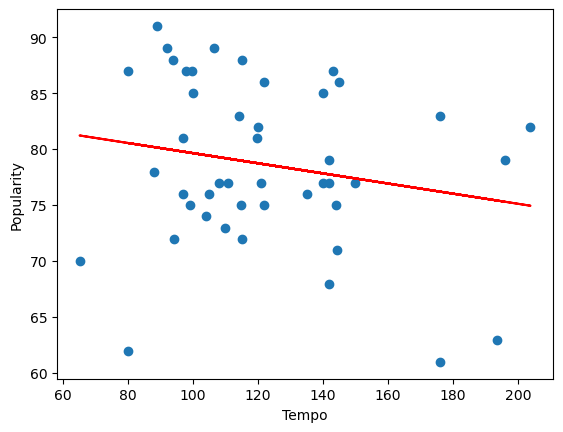

In [128]:
## Graphs/Plots
# All Songs Popularity vs Tempo
x_values = sorted_master_df['tempo']
y_values = sorted_master_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(88,120),fontsize=15,color="red")
plt.xlabel('Tempo')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.02634941261695532


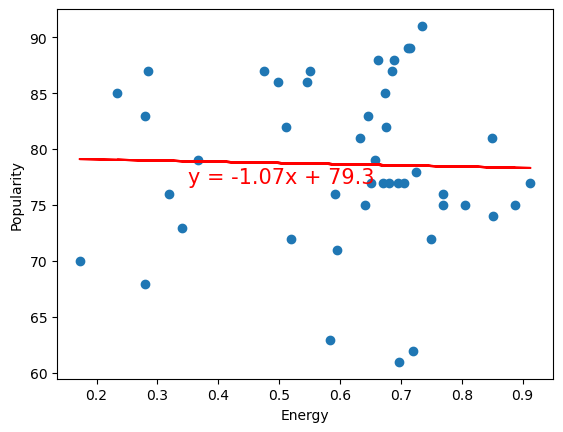

In [129]:
#All Songs Popularity vs Energy
x_values = sorted_master_df['energy']
y_values = sorted_master_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.35,77),fontsize=15,color="red")
plt.xlabel('Energy')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.16486595133894072


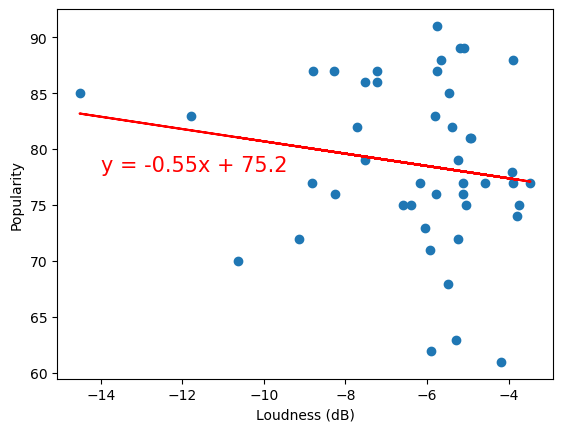

In [130]:
#All Songs Popularity vs Loudness
x_values = sorted_master_df['loudness']
y_values = sorted_master_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-14,78),fontsize=15,color="red")
plt.xlabel('Loudness (dB)')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.1411824869741178


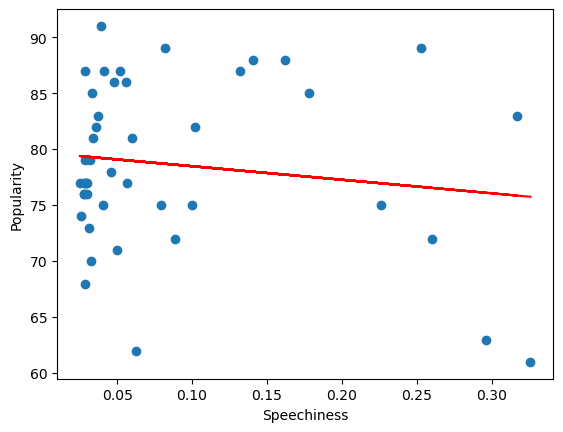

In [131]:
#All Songs Popularity vs Speechiness
x_values = sorted_master_df['speechiness']
y_values = sorted_master_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-14,78),fontsize=15,color="red")
plt.xlabel('Speechiness')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.45190589564394584


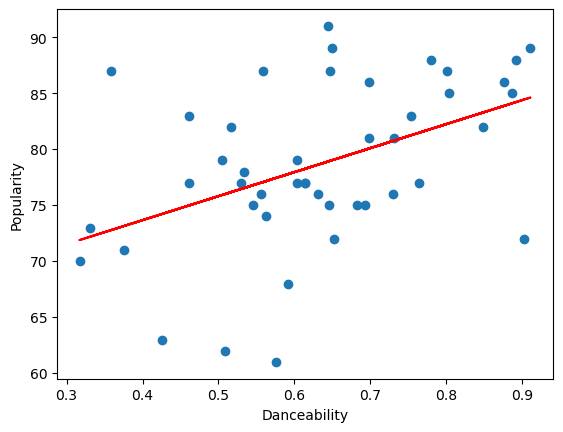

In [132]:
#All Songs Popularity vs Danceability
x_values = sorted_master_df['danceability']
y_values = sorted_master_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-14,78),fontsize=15,color="red")
plt.xlabel('Danceability')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.11304759335866549


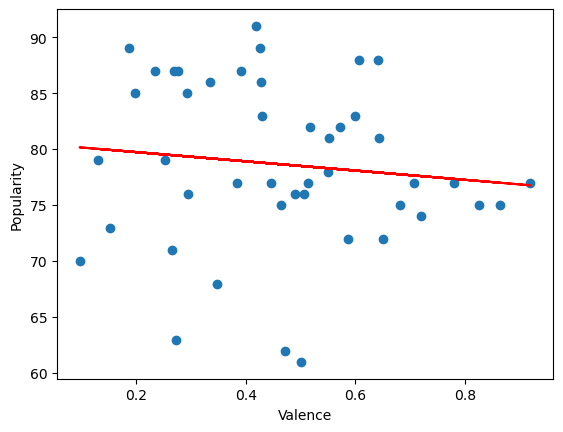

In [133]:
#All Songs Popularity vs Valence
x_values = sorted_master_df['valence']
y_values = sorted_master_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-14,78),fontsize=15,color="red")
plt.xlabel('Valence')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.5196574447983602


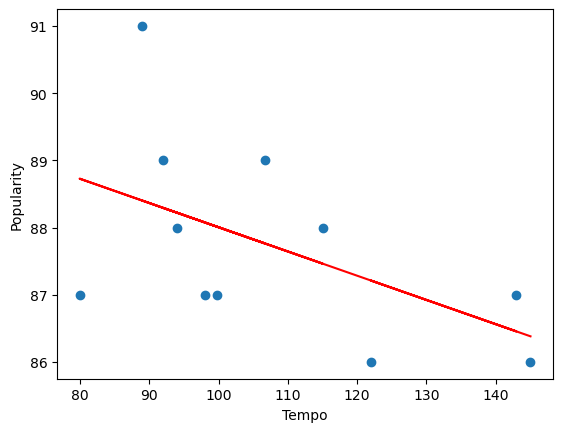

In [74]:
## Top Tiers
# Top Tier Popularity vs Tempo
x_values = top_tier_songs_df['tempo']
y_values = top_tier_songs_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(88,120),fontsize=15,color="red")
plt.xlabel('Tempo')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.6433780317054296


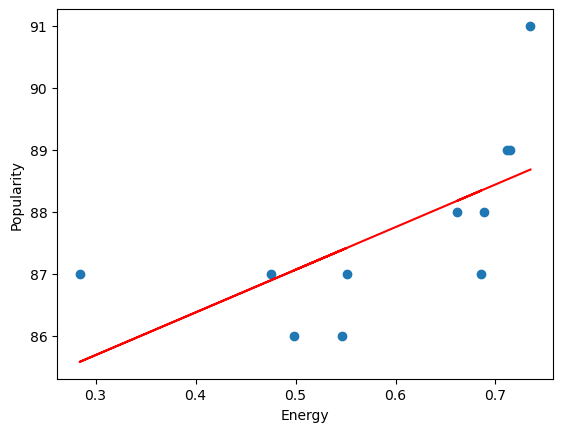

In [75]:
# Top Tier Popularity vs Energy
x_values = top_tier_songs_df['energy']
y_values = top_tier_songs_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(88,120),fontsize=15,color="red")
plt.xlabel('Energy')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.5702654284020059


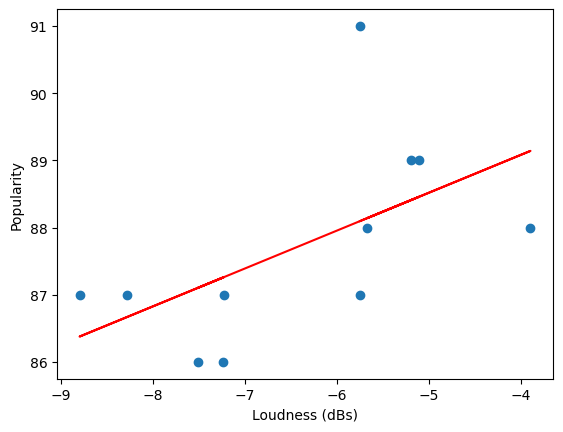

In [76]:
# Top Tier Popularity vs Loudness
x_values = top_tier_songs_df['loudness']
y_values = top_tier_songs_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(88,120),fontsize=15,color="red")
plt.xlabel('Loudness (dBs)')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.2615580754839196


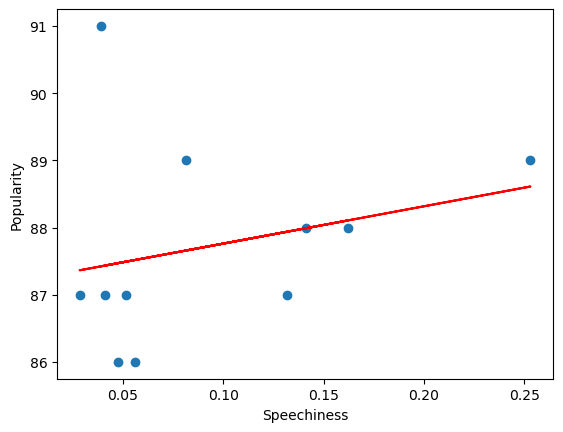

In [77]:
# Top Tier Popularity vs Speechiness
x_values = top_tier_songs_df['speechiness']
y_values = top_tier_songs_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(88,120),fontsize=15,color="red")
plt.xlabel('Speechiness')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.04536278998312535


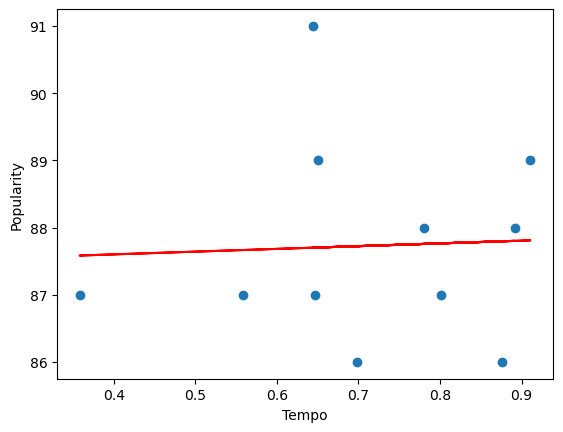

In [78]:
# Top Tier Popularity vs Danceability
x_values = top_tier_songs_df['danceability']
y_values = top_tier_songs_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(88,120),fontsize=15,color="red")
plt.xlabel('Tempo')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.14769504089892688


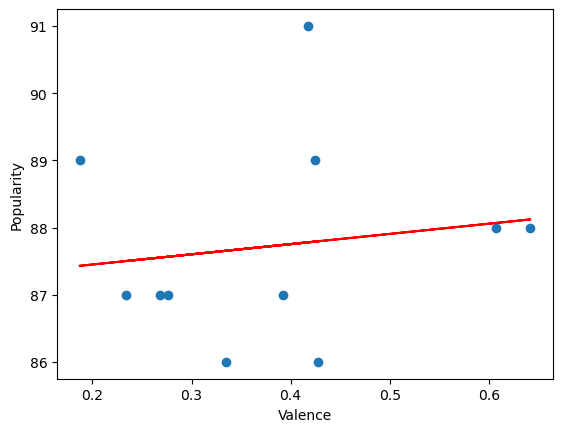

In [79]:
# Top Tier Popularity vs Valence
x_values = top_tier_songs_df['valence']
y_values = top_tier_songs_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(88,120),fontsize=15,color="red")
plt.xlabel('Valence')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.02257153733602098


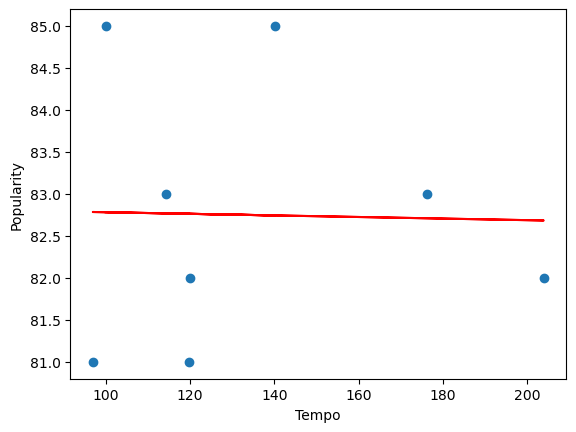

In [80]:
## Upper Mid Tiers
# Upper-Mid Popularity vs Tempo
x_values = second_tier_songs_df['tempo']
y_values = second_tier_songs_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(88,120),fontsize=15,color="red")
plt.xlabel('Tempo')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.5196002664203697


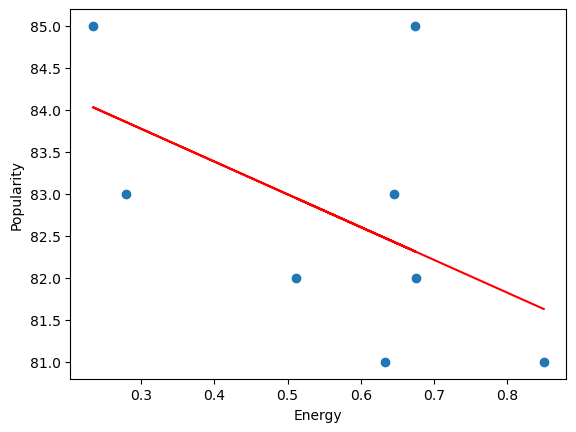

In [81]:
# Upper-Mid Popularity vs Energy
x_values = second_tier_songs_df['energy']
y_values = second_tier_songs_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(88,120),fontsize=15,color="red")
plt.xlabel('Energy')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.5534348920045511


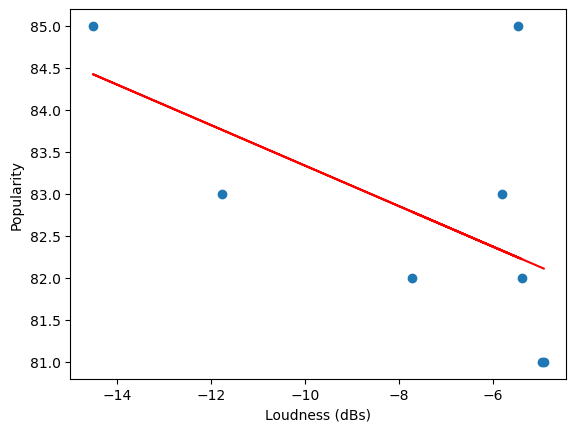

In [82]:
# Upper-Mid Popularity vs Loudness
x_values = second_tier_songs_df['loudness']
y_values = second_tier_songs_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(88,120),fontsize=15,color="red")
plt.xlabel('Loudness (dBs)')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.2655002246887623


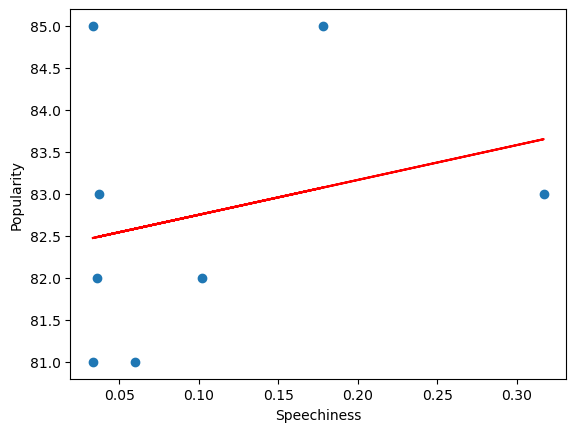

In [83]:
# Upper-Mid Popularity vs Speechiness
x_values = second_tier_songs_df['speechiness']
y_values = second_tier_songs_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(88,120),fontsize=15,color="red")
plt.xlabel('Speechiness')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.34799685345560544


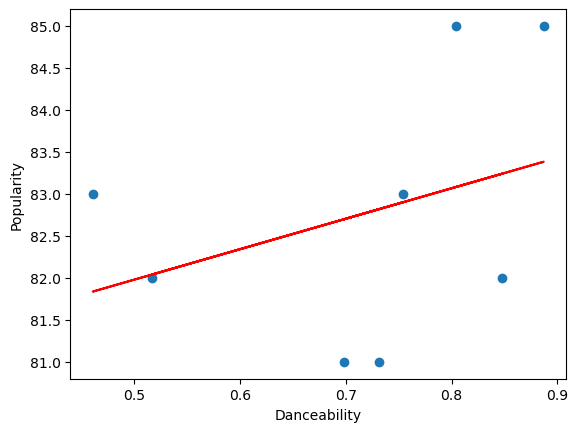

In [84]:
# Upper-Mid Popularity vs Danceability
x_values = second_tier_songs_df['danceability']
y_values = second_tier_songs_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(88,120),fontsize=15,color="red")
plt.xlabel('Danceability')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.8900878947215451


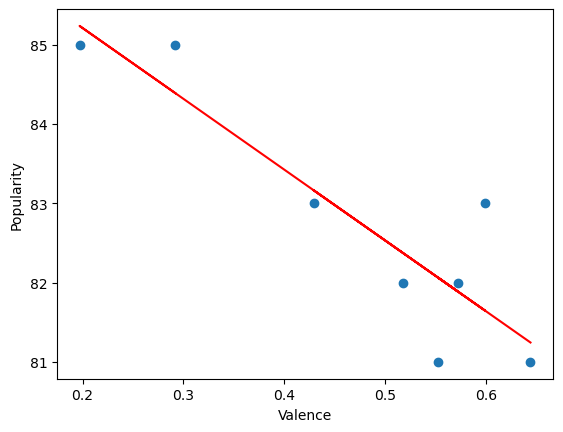

In [85]:
# Upper-Mid Popularity vs Valence
x_values = second_tier_songs_df['valence']
y_values = second_tier_songs_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(88,120),fontsize=15,color="red")
plt.xlabel('Valence')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.4233347615752093


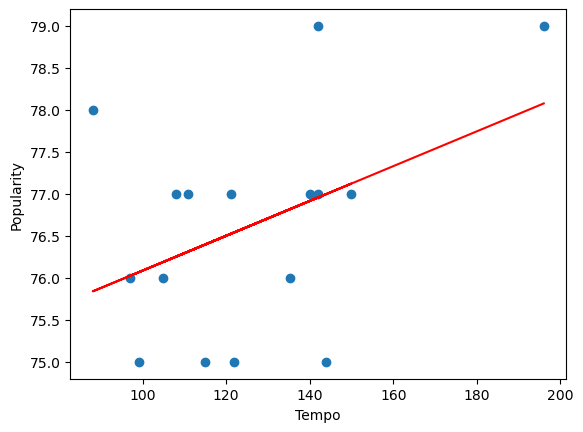

In [86]:
## Lower-Mid 
# Lower-Mid Popularity vs Tempo
x_values = third_tier_songs_df['tempo']
y_values = third_tier_songs_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(88,120),fontsize=15,color="red")
plt.xlabel('Tempo')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.33871963491884094


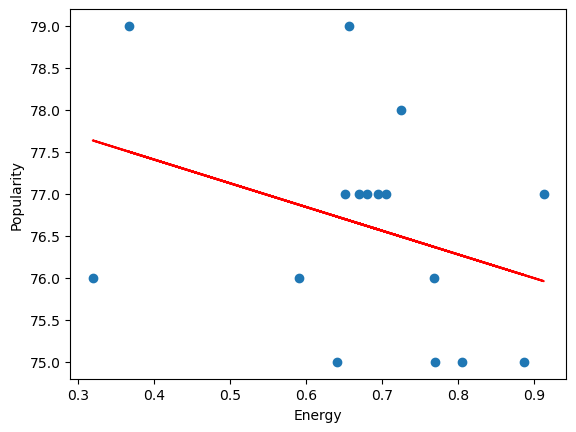

In [87]:
# Lower-Mid Popularity vs Energy
x_values = third_tier_songs_df['energy']
y_values = third_tier_songs_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(88,120),fontsize=15,color="red")
plt.xlabel('Energy')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.010700697414507585


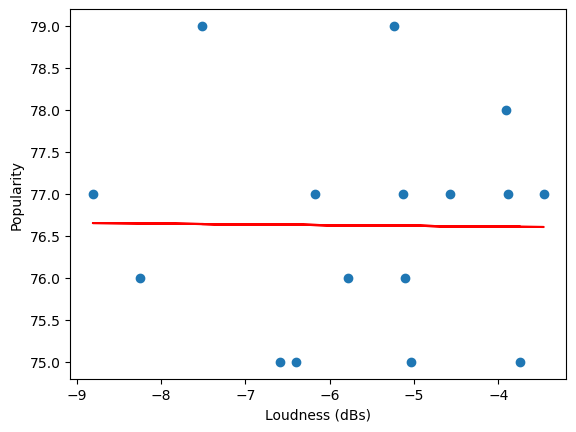

In [88]:
# Lower-Mid Popularity vs Loudness
x_values = third_tier_songs_df['loudness']
y_values = third_tier_songs_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(88,120),fontsize=15,color="red")
plt.xlabel('Loudness (dBs)')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.49679921382585185


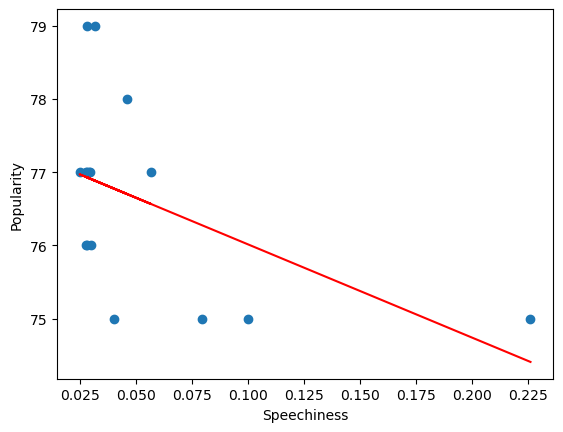

In [89]:
# Lower-Mid Popularity vs Speechiness
x_values = third_tier_songs_df['speechiness']
y_values = third_tier_songs_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(88,120),fontsize=15,color="red")
plt.xlabel('Speechiness')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.39933903997596404


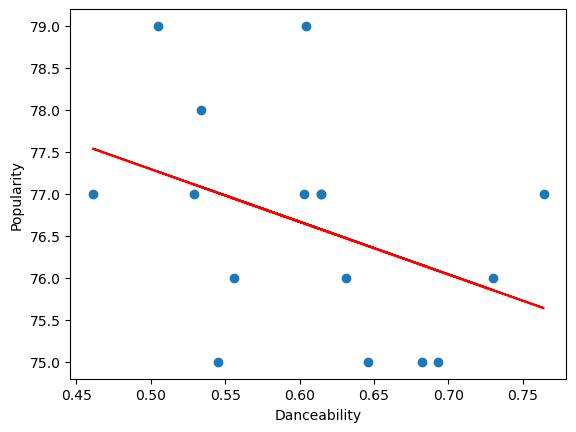

In [90]:
# Lower-Mid Popularity vs Danceability
x_values = third_tier_songs_df['danceability']
y_values = third_tier_songs_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(88,120),fontsize=15,color="red")
plt.xlabel('Danceability')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.5193021242561959


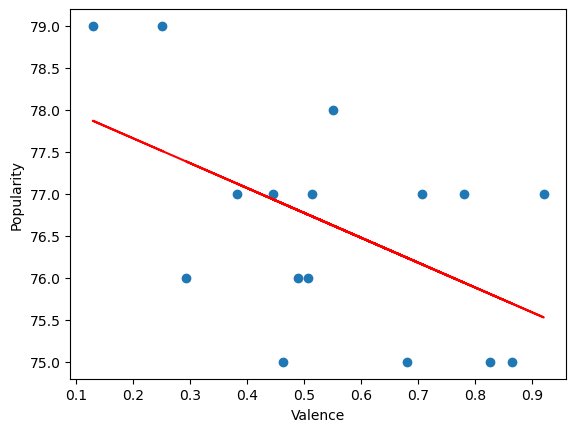

In [91]:
# Lower-Mid Popularity vs Valence
x_values = third_tier_songs_df['valence']
y_values = third_tier_songs_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(88,120),fontsize=15,color="red")
plt.xlabel('Valence')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.4673825739183101


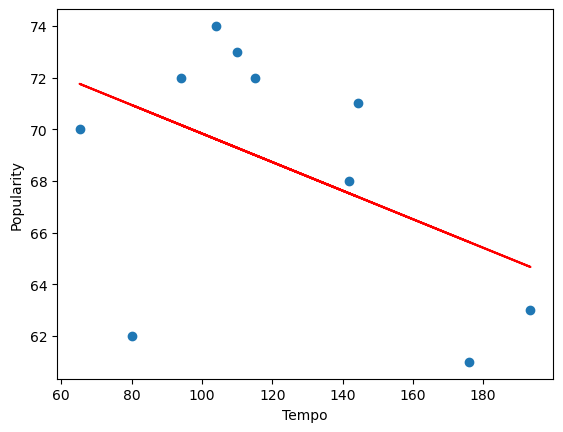

In [92]:
## Least Popular 
# Lowest Popularity vs Tempo
x_values = bottom_tier_songs_df['tempo']
y_values = bottom_tier_songs_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(88,120),fontsize=15,color="red")
plt.xlabel('Tempo')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.1453289364916414


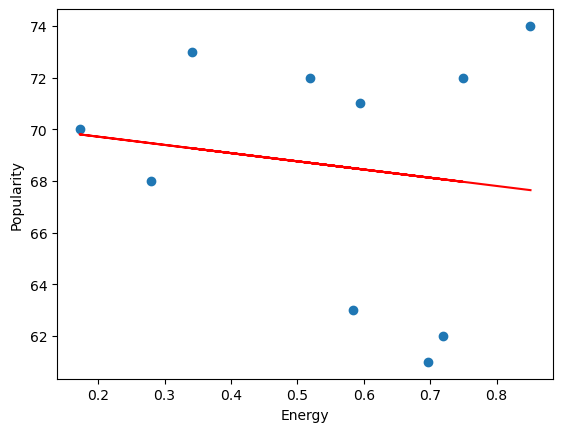

In [93]:
# Lowest Popularity vs Energy
x_values = bottom_tier_songs_df['energy']
y_values = bottom_tier_songs_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(88,120),fontsize=15,color="red")
plt.xlabel('Energy')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.23118882712086167


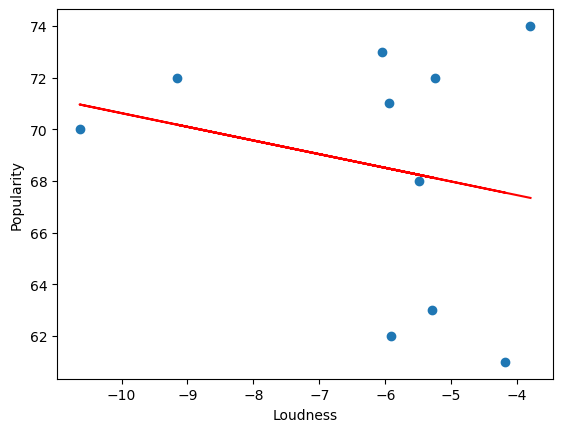

In [94]:
# Lowest Popularity vs Loudness
x_values = bottom_tier_songs_df['loudness']
y_values = bottom_tier_songs_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(88,120),fontsize=15,color="red")
plt.xlabel('Loudness')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.5490116408619801


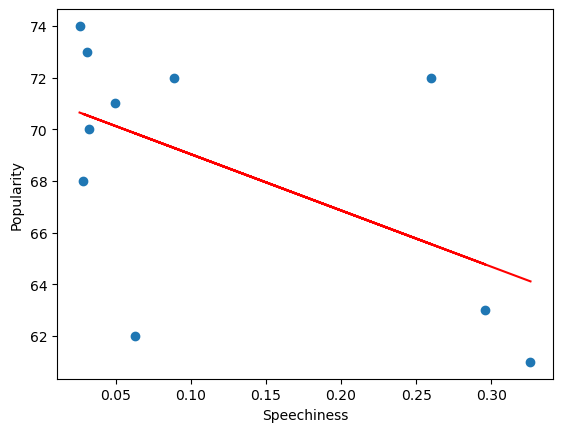

In [95]:
# Lowest Popularity vs Speechiness
x_values = bottom_tier_songs_df['speechiness']
y_values = bottom_tier_songs_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(88,120),fontsize=15,color="red")
plt.xlabel('Speechiness')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.0853878408095789


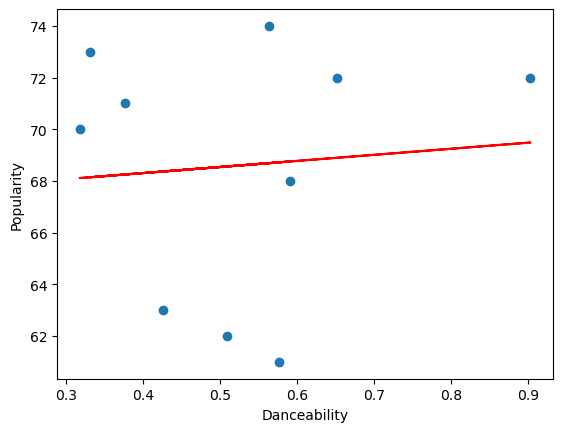

In [96]:
# Lowest Popularity vs Danceability
x_values = bottom_tier_songs_df['danceability']
y_values = bottom_tier_songs_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(88,120),fontsize=15,color="red")
plt.xlabel('Danceability')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.09493546303436695


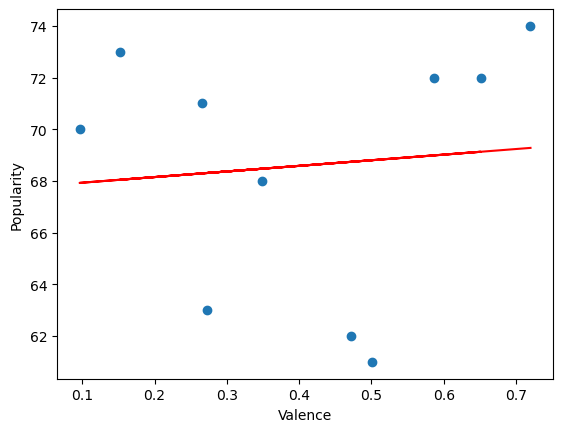

In [97]:
# Lowest Popularity vs Valence
x_values = bottom_tier_songs_df['valence']
y_values = bottom_tier_songs_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(88,120),fontsize=15,color="red")
plt.xlabel('Valence')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.14718507903390818


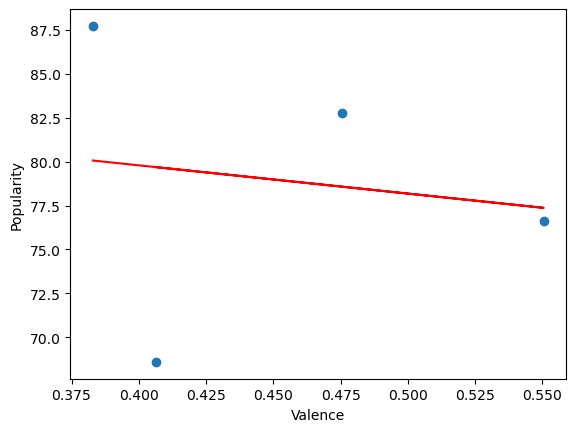

In [134]:
## Comparison Plots
x_values=comparison_df_final['Valence Mean Comparison']
y_values=comparison_df_final['Popularity Mean Comparison']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(88,120),fontsize=15,color="red")
plt.xlabel('Valence')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

Text(0.5, 1.0, 'Average Tempo by Song Popularity')

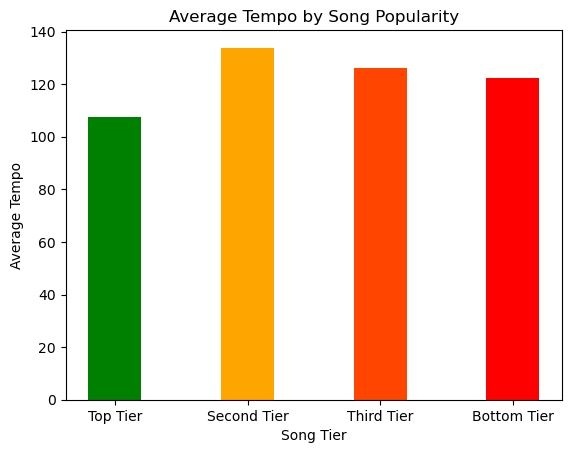

In [99]:
## Comparison Bars
# Song Tiers vs Tempo
colors=['green', 'orange', 'orangered', 'red']
plt.bar(comparison_df_final.index.values, comparison_df_final['Tempo Mean Comparison'], 0.4, bottom=np.zeros(len(comparison_df_final['Danceability Mean Comparison'])), color=colors)
plt.ylabel('Average Tempo')
plt.xlabel('Song Tier')
plt.title('Average Tempo by Song Popularity')


Text(0.5, 1.0, 'Average Energy by Song Popularity')

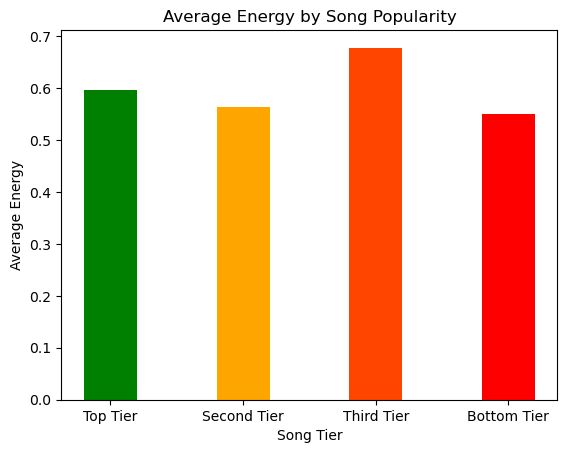

In [100]:
# Song Tiers vs Energy
colors=['green', 'orange', 'orangered', 'red']
plt.bar(comparison_df_final.index.values, comparison_df_final['Energy Mean Comparison'], 0.4, bottom=np.zeros(len(comparison_df_final['Danceability Mean Comparison'])), color=colors)
plt.ylabel('Average Energy')
plt.xlabel('Song Tier')
plt.title('Average Energy by Song Popularity')

Text(0.5, 1.0, 'Average Loudness by Song Popularity')

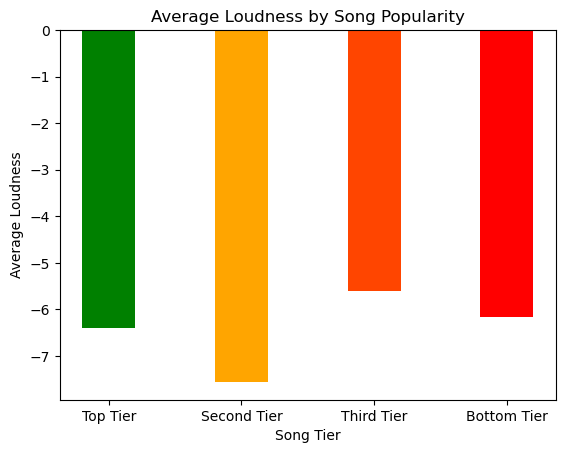

In [101]:
# Song Tiers vs Loudness
colors=['green', 'orange', 'orangered', 'red']
plt.bar(comparison_df_final.index.values, comparison_df_final['Loudness Mean Comparison'], 0.4, bottom=np.zeros(len(comparison_df_final['Danceability Mean Comparison'])), color=colors)
plt.ylabel('Average Loudness')
plt.xlabel('Song Tier')
plt.title('Average Loudness by Song Popularity')

Text(0.5, 1.0, 'Average Speechiness by Song Popularity')

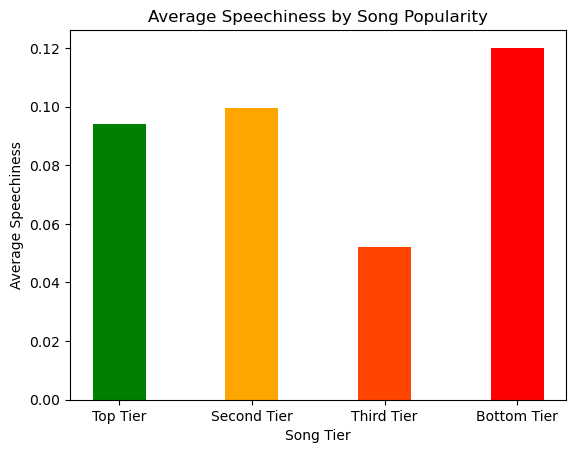

In [102]:
# Song Tiers vs Speechiness
colors=['green', 'orange', 'orangered', 'red']
plt.bar(comparison_df_final.index.values, comparison_df_final['Speechiness Mean Comparison'], 0.4, bottom=np.zeros(len(comparison_df_final['Danceability Mean Comparison'])), color=colors)
plt.ylabel('Average Speechiness')
plt.xlabel('Song Tier')
plt.title('Average Speechiness by Song Popularity')

Text(0.5, 1.0, 'Average Danceability by Song Popularity')

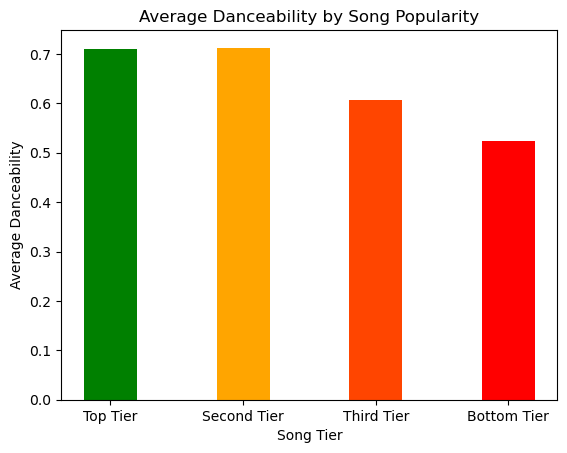

In [103]:
# Song Tiers vs Danceability
colors=['green', 'orange', 'orangered', 'red']
plt.bar(comparison_df_final.index.values, comparison_df_final['Danceability Mean Comparison'], 0.4, bottom=np.zeros(len(comparison_df_final['Danceability Mean Comparison'])), color=colors)
plt.ylabel('Average Danceability')
plt.xlabel('Song Tier')
plt.title('Average Danceability by Song Popularity')

Text(0.5, 1.0, 'Average Valence by Song Popularity')

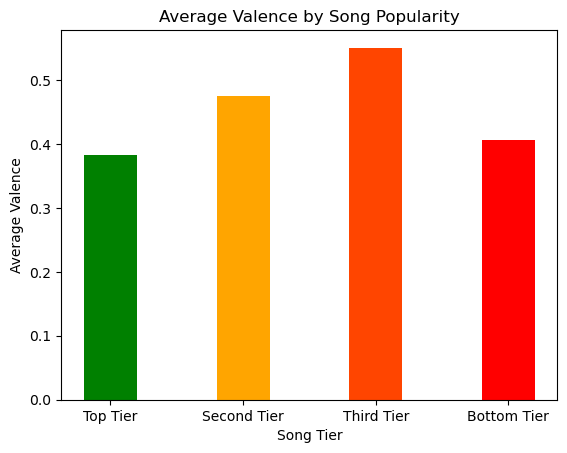

In [105]:
# Song Tiers vs Danceability
colors=['green', 'orange', 'orangered', 'red']
plt.bar(comparison_df_final.index.values, comparison_df_final['Valence Mean Comparison'], 0.4, bottom=np.zeros(len(comparison_df_final['Danceability Mean Comparison'])), color=colors)
plt.ylabel('Average Valence')
plt.xlabel('Song Tier')
plt.title('Average Valence by Song Popularity')

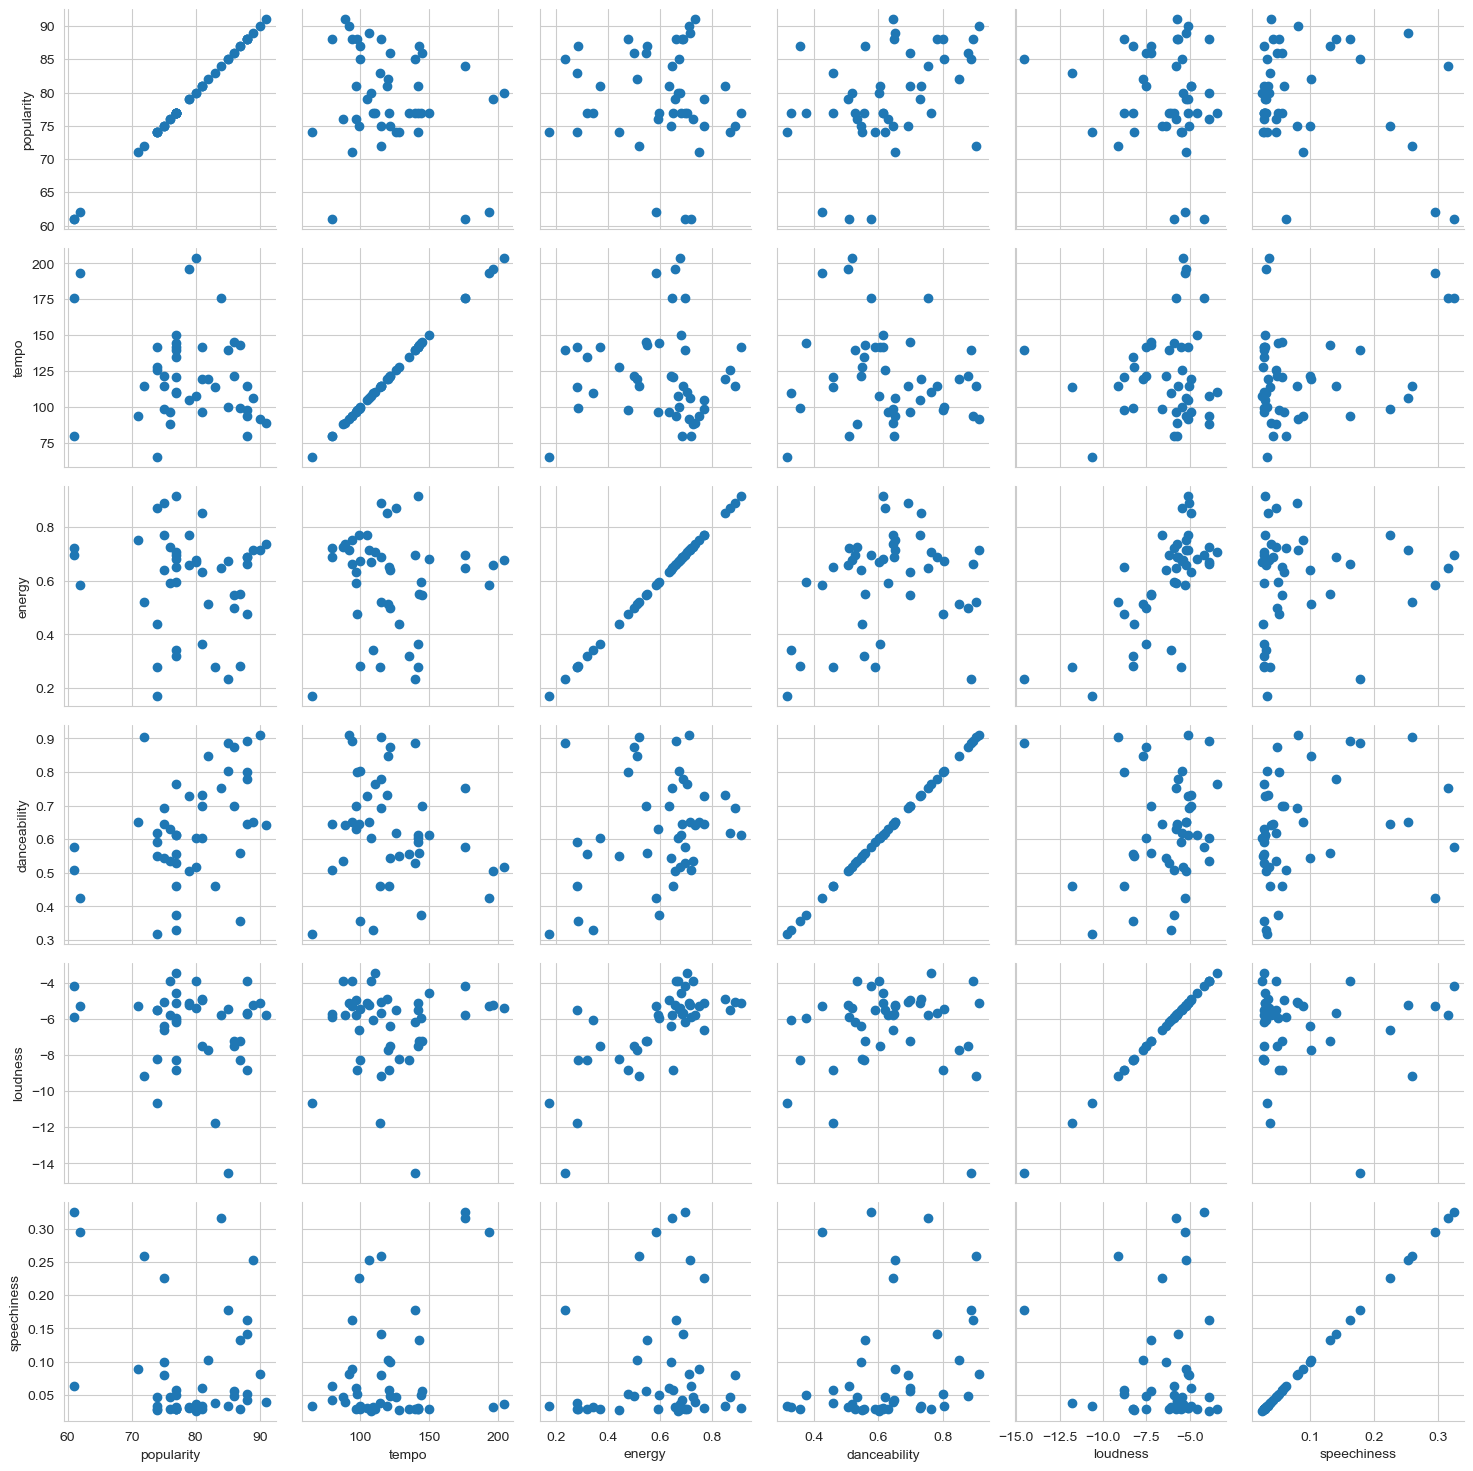

In [75]:
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
g = sns.PairGrid(master_track_df)
g.map(plt.scatter)